In [327]:
team_colors = {
    "UTSA": "#0C2340",
    "Charlotte": "#154734",
    "Kennesaw State": "#FFCC00",
    "Florida International": "#081E3F",
    "Coastal Carolina": "#007C92",
    "Air Force": "#0033A0",
    "Akron": "#041E42",
    "Alabama": "#9E1B32",
    "App State": "#FFCC00",
    "Arizona": "#CC0033",
    "Arizona State": "#8C1D40",
    "Arkansas": "#9D2235",
    "Arkansas State": "#CC092F",
    "Army": "#BFAF80",
    "Auburn": "#0C2340",
    "Ball State": "#BA0C2F",
    "Baylor": "#154733",
    "Boise State": "#0033A0",
    "Boston College": "#98002E",
    "Bowling Green": "#FA4616",
    "BYU": "#002E5D",
    "Buffalo": "#005BBB",
    "California": "#003262",
    "UCF": "#B5895B",
    "Central Michigan": "#6A0032",
    "Cincinnati": "#D50032",
    "Clemson": "#F56600",
    "Colorado": "#CFB87C",
    "Colorado State": "#2A6833",
    "Duke": "#00539B",
    "East Carolina": "#592A8A",
    "Eastern Michigan": "#006633",
    "Florida Atlantic": "#002855",
    "Florida": "#0021A5",
    "Florida State": "#782F40",
    "Fresno State": "#D50032",
    "Georgia Southern": "#041E42",
    "Georgia Tech": "#B3A369",
    "Georgia": "#BA0C2F",
    "Hawai'i": "#024731",
    "Houston": "#C8102E",
    "Illinois": "#E84A27",
    "Indiana": "#990000",
    "Iowa": "#FFCD00",
    "Iowa State": "#C8102E",
    "James Madison": "#450084",
    "Jacksonville State": "#A30D26",
    "Kansas": "#0051BA",
    "Kansas State": "#512888",
    "Kent State": "#FDC82F",
    "Kentucky": "#0033A0",
    "Louisiana": "#D50032",
    "UL Monroe": "#862633",
    "Louisiana Tech": "#0046AD",
    "Liberty": "#A6192E",
    "Louisville": "#AD0000",
    "LSU": "#461D7C",
    "Marshall": "#00A862",
    "Maryland": "#E03A3E",
    "Memphis": "#003087",
    "Miami": "#005030",
    "Miami (OH)": "#BA0C2F",
    "Michigan": "#00274C",
    "Michigan State": "#18453B",
    "Middle Tennessee": "#005DAA",
    "Minnesota": "#7A0019",
    "Missouri": "#F1B82D",
    "Mississippi State": "#660000",
    "Navy": "#00205B",
    "NC State": "#CC0000",
    "Nebraska": "#D00000",
    "Nevada": "#003366",
    "New Mexico": "#D50032",
    "New Mexico State": "#862633",
    "Northern Illinois": "#C8102E",
    "North Texas": "#00853E",
    "Northwestern": "#4E2A84",
    "Notre Dame": "#C99700",
    "Ohio": "#006A4D",
    "Ohio State": "#BB0000",
    "Oklahoma": "#841617",
    "Oklahoma State": "#FF7300",
    "Ole Miss": "#CE1126",
    "Oregon": "#154733",
    "Oregon State": "#DC4405",
    "Penn State": "#041E42",
    "Pittsburgh": "#003594",
    "Purdue": "#C28E0E",
    "Rice": "#00205B",
    "Rutgers": "#CC0033",
    "Sam Houston": "#E35205",
    "San Diego State": "#A6192E",
    "San José State": "#0055A2",
    "SMU": "#C60C30",
    "South Carolina": "#73000A",
    "South Florida": "#006747",
    "Stanford": "#8C1515",
    "Texas State": "#461D7C",
    "Syracuse": "#D44500",
    "TCU": "#4D1979",
    "Temple": "#9E1B32",
    "Tennessee": "#FF8200",
    "Texas": "#BF5700",
    "Texas A&M": "#500000",
    "Texas Tech": "#C8102E",
    "Toledo": "#FFCC00",
    "Troy": "#841617",
    "Tulane": "#008E97",
    "UAB": "#006A4D",
    "UCLA": "#2774AE",
    "UConn": "#041E42",
    "Massachusetts": "#881C1C",
    "North Carolina": "#4B9CD3",
    "UNLV": "#BA0C2F",
    "USC": "#9D2235",
    "Utah": "#CC0000",
    "Utah State": "#041E42",
    "UTEP": "#041E42",
    "Vanderbilt": "#866D4B",
    "Virginia Tech": "#630031",
    "Virginia": "#232D4B",
    "Wake Forest": "#9E7E38",
    "Washington": "#4B2E83",
    "Washington State": "#981E32",
    "Western Kentucky": "#D50032",
    "Western Michigan": "#5A3825",
    "West Virginia": "#EAAA00",
    "Wyoming": "#FFC72C",
    "South Alabama": "#041E42",
    "Georgia State": "#0033A0",
    "Southern Miss": "#FFC72C",
    "Wisconsin": "#C5050C",
    "Old Dominion": "#041E42",
    "Tulsa": "#007AC1",
    "Idaho": "#B3995D",
}


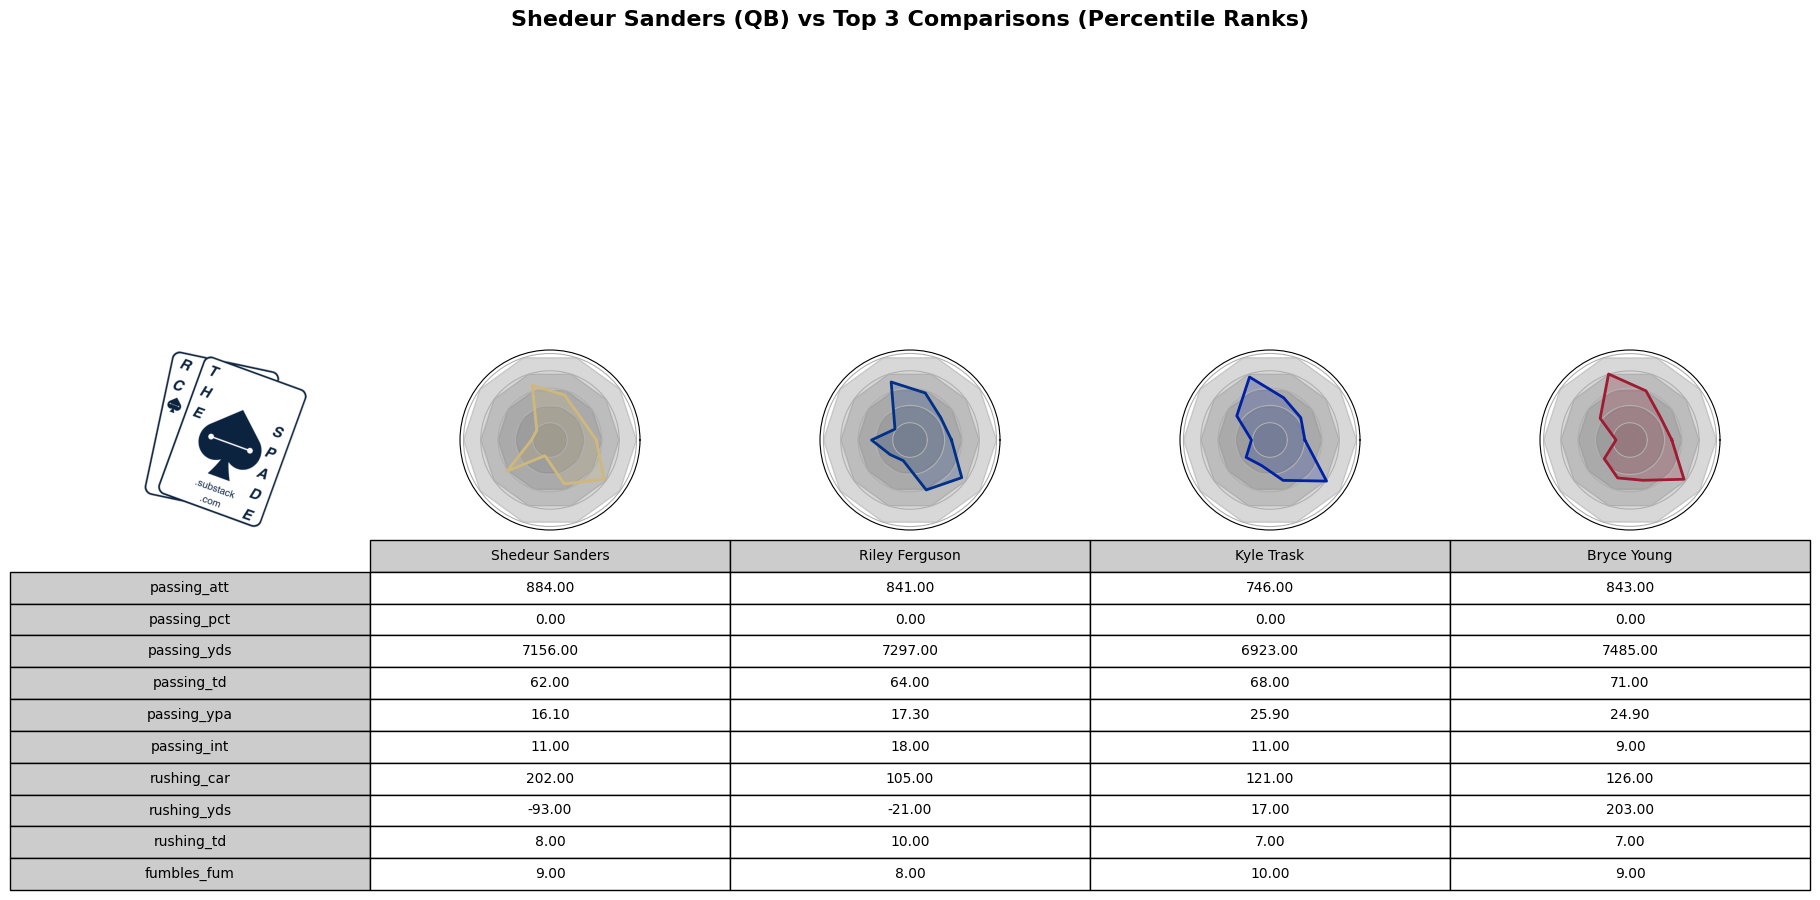

In [143]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from scipy.stats import rankdata

# Load datasets
filtered_stats = pd.read_csv("filtered_player_stats_full.csv")
combine_stats = pd.read_csv("combine_data_unique_athlete_id_step4.csv")

# Rename columns in combine_stats to match filtered_stats
combine_stats.rename(columns={"Name": "player", "POS": "position"}, inplace=True)

# Merge position data from combine_stats into filtered_stats
filtered_stats = filtered_stats.merge(
    combine_stats[["player", "position"]],
    on="player",
    how="left"
)

# **Manually assign "QB" to Shedeur Sanders since he has no combine data**
filtered_stats.loc[filtered_stats["player"] == "Shedeur Sanders", "position"] = "QB"

# Define player and position
input_player = "Shedeur Sanders"

# Get the player's position
player_position = filtered_stats.loc[filtered_stats["player"] == input_player, "position"].values[0]

# Define position-based metrics
POSITION_BASELINES = {
    "QB": [
        "passing_att", "passing_pct", "passing_yds", "passing_td",
        "passing_ypa", "passing_int", "rushing_car", "rushing_yds",
        "rushing_td", "fumbles_fum"
    ]
}

# Keep only players with the same position as the input player
df = filtered_stats[filtered_stats["position"] == player_position]

# Sum player stats across seasons (except percentage-based ones)
df = df.groupby("player").sum().reset_index()

# **Handle special cases for averaging certain metrics**
for metric in ["passing_pct", "rushing_ypc"]:
    if metric in df.columns:
        df[metric] = filtered_stats.groupby("player")[metric].mean().reset_index()[metric]

# Keep only relevant metrics
valid_metrics = [col for col in POSITION_BASELINES.get(player_position, []) if col in df.columns]

# Convert to numeric & replace NaN
df[valid_metrics] = df[valid_metrics].apply(pd.to_numeric, errors="coerce").fillna(0)

# Compute **percentile ranks** for each metric (normalized to 0-1)
df_percentiles = df.copy()
for metric in valid_metrics:
    df_percentiles[metric] = rankdata(df[metric], method="average") / len(df)

# Get the player's data in percentile form
player_percentiles = df_percentiles[df_percentiles["player"] == input_player][valid_metrics].iloc[0]

# Compute similarity & find top 3 closest comparisons
df_percentiles["similarity"] = df_percentiles[valid_metrics].apply(lambda row: np.linalg.norm(row - player_percentiles), axis=1)
top3 = df_percentiles[df_percentiles["player"] != input_player].nsmallest(3, "similarity").reset_index()

# Get team colors for each player
player_teams = filtered_stats.set_index("player")["team"].to_dict()
comparison_players = [input_player] + top3["player"].tolist()
player_colors = [team_colors.get(player_teams.get(player, ""), "gray") for player in comparison_players]

# Prepare Radar Chart Data
data_for_radar = [player_percentiles.values] + [df_percentiles[df_percentiles["player"] == p][valid_metrics].iloc[0].values for p in top3["player"]]

# Radar Chart Layout
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_axis_off()
angles = np.linspace(0, 2 * np.pi, len(valid_metrics), endpoint=False)
angles_closed = np.concatenate([angles, [angles[0]]])

# Adjust Radar Positions
radar_height = 0.18  
radar_width = 0.18
radar_y = 0.46
col_centers = np.linspace(0.3, 0.9, len(comparison_players))

for i, (player_name, pvec, color) in enumerate(zip(comparison_players, data_for_radar, player_colors)):
    pvec_closed = np.concatenate([pvec, [pvec[0]]])
    ax_pos = [col_centers[i] - radar_width / 2, radar_y, radar_width, radar_height]
    rax = fig.add_axes(ax_pos, polar=True)

    for ring in range(1, 6):
        rax.fill(angles_closed, [ring / 5] * len(angles_closed), color="gray", alpha=0.3)

    rax.plot(angles_closed, pvec_closed, color=color, linewidth=2)
    rax.fill(angles_closed, pvec_closed, color=color, alpha=0.2)
    rax.set_yticklabels([])
    rax.set_xticks([])
    rax.set_xticklabels([])
    rax.set_title("", fontsize=0)

# Add Placeholder Image (1.png)
image_path = "1.png"
img_ax = fig.add_axes([0.03, radar_y, radar_width, radar_height], frameon=False)
img = mpimg.imread(image_path)
img_ax.imshow(img)
img_ax.set_xticks([])
img_ax.set_yticks([])

# Title
fig.patch.set_facecolor("white")
plt.suptitle(f"{input_player} ({player_position}) vs Top 3 Comparisons (Percentile Ranks)", fontsize=16, fontweight="bold", y=0.98)

# Table Layout
table_ax = fig.add_axes([0, 0.1, 1, 0.35])
table_ax.set_axis_off()
table = Table(table_ax, bbox=[0, 0, 1, 1])

# Raw stats for table
comparison_data = df.loc[df["player"].isin(comparison_players), ["player"] + valid_metrics].set_index("player")
comparison_data = comparison_data.loc[comparison_players, valid_metrics]
comparison_data_t = comparison_data.transpose()

nrows, ncols = comparison_data_t.shape
cell_width = 1 / (ncols + 1)
cell_height = 1 / (nrows + 1)

for col_idx, column in enumerate(comparison_data_t.columns):
    table.add_cell(0, col_idx + 1, cell_width, cell_height, text=column, loc="center", facecolor="#cccccc")

for row_idx, row_name in enumerate(comparison_data_t.index):
    table.add_cell(row_idx + 1, 0, cell_width, cell_height, text=row_name, loc="center", facecolor="#cccccc")

for row_idx, row_vals in enumerate(comparison_data_t.values):
    for col_idx, val in enumerate(row_vals):
        disp = f"{val:.2f}" if pd.notnull(val) else "N/A"
        table.add_cell(row_idx + 1, col_idx + 1, cell_width, cell_height, text=disp, loc="center")

table_ax.add_table(table)
plt.show()


In [121]:
import pandas as pd
from IPython.display import display

# Increase max row display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Load datasets
filtered_stats = pd.read_csv("filtered_player_stats_full.csv")
combine_stats = pd.read_csv("combine_data_unique_athlete_id_step4.csv")

# Rename player column in combine_stats to match filtered_stats (if needed)
combine_stats.rename(columns={"Name": "player"}, inplace=True)

# Filter for Shedeur Sanders in both datasets
shedeur_filtered = filtered_stats[filtered_stats["player"] == "Shedeur Sanders"]
shedeur_combine = combine_stats[combine_stats["player"] == "Shedeur Sanders"]

# Display all rows
display(shedeur_filtered)


,year,team,conference,athlete_id,player,passing_completions,passing_att,passing_pct,passing_yds,passing_td,passing_int,passing_ypa,rushing_car,rushing_yds,rushing_td,rushing_ypc,rushing_long,receiving_rec,receiving_yds,receiving_td,receiving_ypr,receiving_long,fumbles_fum,fumbles_rec,fumbles_lost,defensive_solo,defensive_tot,defensive_tfl,defensive_sacks,defensive_qb_hur,interceptions_int,interceptions_yds,interceptions_avg,interceptions_td,defensive_pd,defensive_td,kicking_fgm,kicking_fga,kicking_pct,kicking_xpa,kicking_xpm,kicking_pts,kicking_long,kick_returns_no,kick_returns_yds,kick_returns_avg,kick_returns_td,kick_returns_long,punting_no,punting_yds,punting_ypp,punting_long,punting_in_20,punting_tb,punt_returns_no,punt_returns_yds,punt_returns_avg,punt_returns_td,punt_returns_long
1195,2024,Colorado,Big 12,4432762,Shedeur Sanders,337.0,454.0,0.742,3926.0,35.0,8.0,8.6,91.0,-16.0,4.0,-0.2,17.0,NaN,NaN,NaN,NaN,NaN,4.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10838,2023,Colorado,Pac-12,4432762,Shedeur Sanders,298.0,430.0,0.693,3230.0,27.0,3.0,7.5,111.0,-77.0,4.0,-0.7,38.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
import pandas as pd

# Load dataset
filtered_stats = pd.read_csv("filtered_player_stats_full.csv")

# Ensure athlete_id is in the DataFrame
if "athlete_id" not in filtered_stats.columns:
    raise KeyError("athlete_id column is missing from filtered_player_stats_full.csv!")

# Get Shedeur Sanders' athlete_id
shedeur_athlete_id = filtered_stats.loc[filtered_stats["player"] == "Shedeur Sanders", "athlete_id"].values

# Ensure we found a valid athlete_id
if len(shedeur_athlete_id) == 0:
    raise ValueError("Shedeur Sanders not found in filtered_player_stats_full.csv!")
    
# Generate the headshot link
headshot_url = f"https://a.espncdn.com/combiner/i?img=/i/headshots/college-football/players/full/{int(shedeur_athlete_id[0])}.png&w=350&h=254"

# Print the link
print("Shedeur Sanders' headshot URL:", headshot_url)


Shedeur Sanders' headshot URL: https://a.espncdn.com/combiner/i?img=/i/headshots/college-football/players/full/4432762.png&w=350&h=254


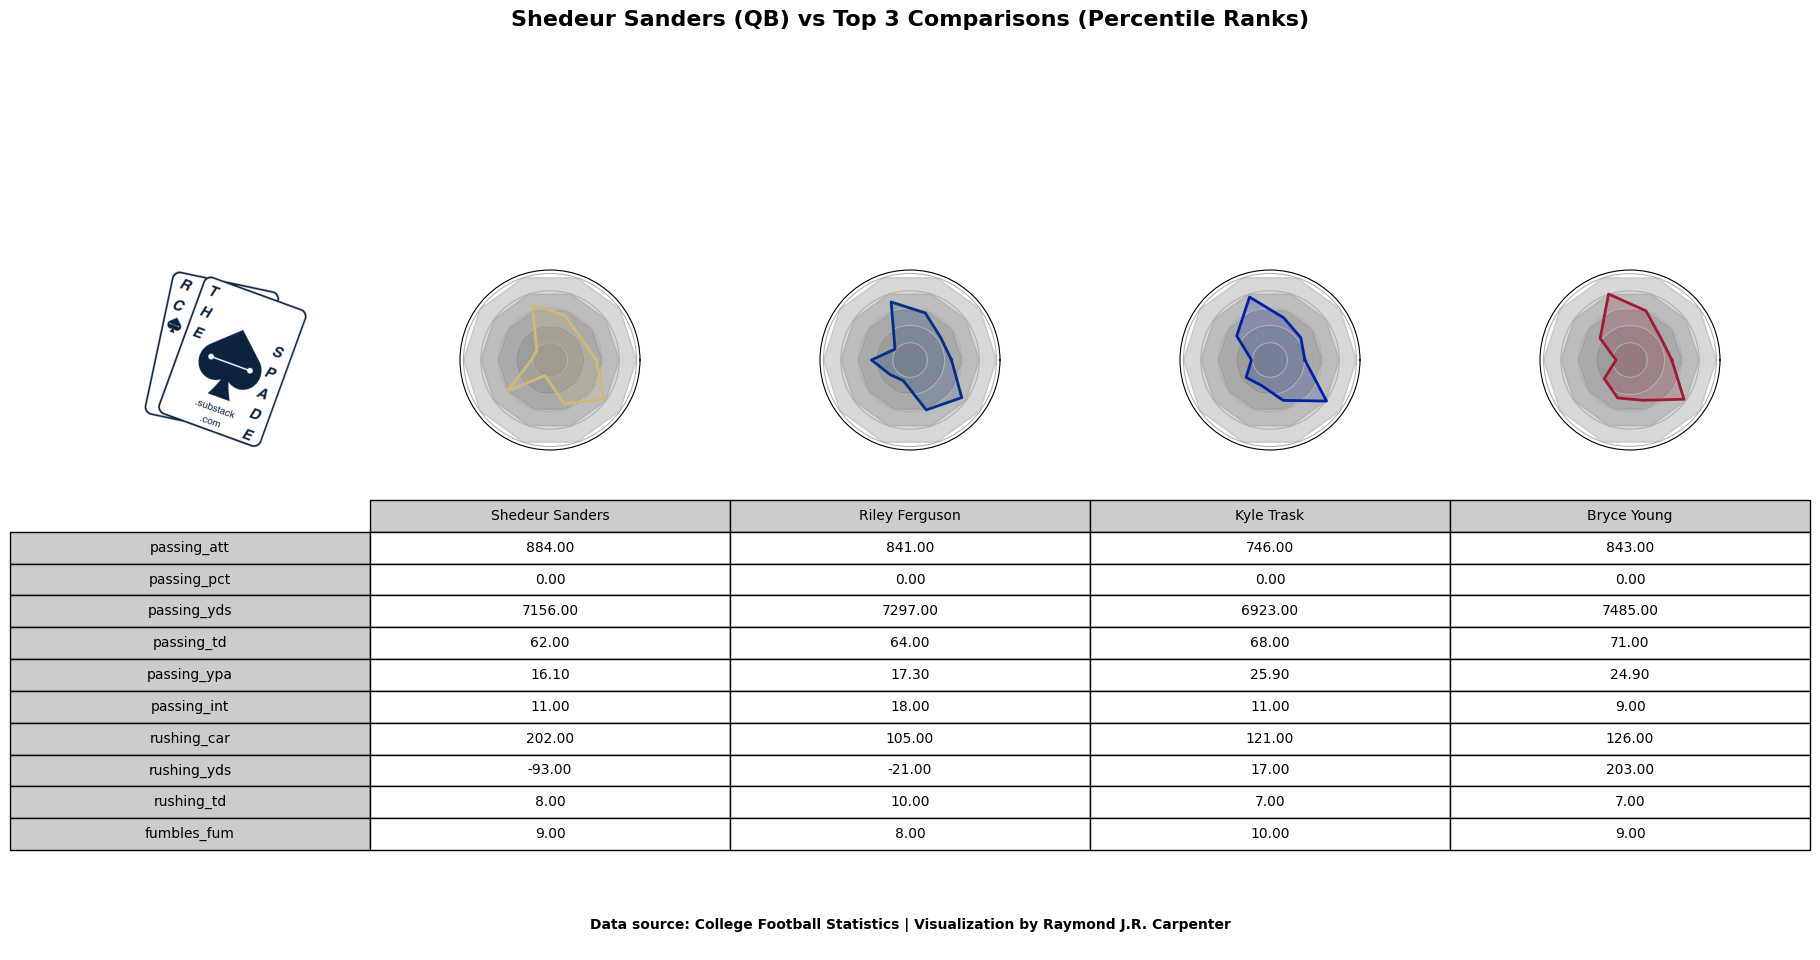

In [150]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from scipy.stats import rankdata

# Load datasets
filtered_stats = pd.read_csv("filtered_player_stats_full.csv")
combine_stats = pd.read_csv("combine_data_unique_athlete_id_step4.csv")

# Rename columns in combine_stats to match filtered_stats
combine_stats.rename(columns={"Name": "player", "POS": "position"}, inplace=True)

# Merge position data from combine_stats into filtered_stats
filtered_stats = filtered_stats.merge(
    combine_stats[["player", "position"]],
    on="player",
    how="left"
)

# Manually assign "QB" to Shedeur Sanders since he has no combine data
filtered_stats.loc[filtered_stats["player"] == "Shedeur Sanders", "position"] = "QB"

# Define player and position
input_player = "Shedeur Sanders"

# Get the player's position
player_position = filtered_stats.loc[filtered_stats["player"] == input_player, "position"].values[0]

# Define position-based metrics
POSITION_BASELINES = {
    "QB": [
        "passing_att", "passing_pct", "passing_yds", "passing_td",
        "passing_ypa", "passing_int", "rushing_car", "rushing_yds",
        "rushing_td", "fumbles_fum"
    ]
}

# Keep only players with the same position as the input player
df = filtered_stats[filtered_stats["position"] == player_position]

# Sum player stats across seasons (except percentage-based ones)
df = df.groupby("player").sum().reset_index()

# Handle special cases for averaging certain metrics
for metric in ["passing_pct", "rushing_ypc"]:
    if metric in df.columns:
        df[metric] = filtered_stats.groupby("player")[metric].mean().reset_index()[metric]

# Keep only relevant metrics
valid_metrics = [col for col in POSITION_BASELINES.get(player_position, []) if col in df.columns]

# Convert to numeric & replace NaN
df[valid_metrics] = df[valid_metrics].apply(pd.to_numeric, errors="coerce").fillna(0)

# Compute percentile ranks for each metric (normalized to 0-1)
df_percentiles = df.copy()
for metric in valid_metrics:
    df_percentiles[metric] = rankdata(df[metric], method="average") / len(df)

# Get the player's data in percentile form
player_percentiles = df_percentiles[df_percentiles["player"] == input_player][valid_metrics].iloc[0]

# Compute similarity & find top 3 closest comparisons
df_percentiles["similarity"] = df_percentiles[valid_metrics].apply(lambda row: np.linalg.norm(row - player_percentiles), axis=1)
top3 = df_percentiles[df_percentiles["player"] != input_player].nsmallest(3, "similarity").reset_index()

# Get team colors for each player
player_teams = filtered_stats.set_index("player")["team"].to_dict()
comparison_players = [input_player] + top3["player"].tolist()
player_colors = [team_colors.get(player_teams.get(player, ""), "gray") for player in comparison_players]

# Prepare Radar Chart Data
data_for_radar = [player_percentiles.values] + [df_percentiles[df_percentiles["player"] == p][valid_metrics].iloc[0].values for p in top3["player"]]

# Radar Chart Layout
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_axis_off()
angles = np.linspace(0, 2 * np.pi, len(valid_metrics), endpoint=False)
angles_closed = np.concatenate([angles, [angles[0]]])

# Adjust Radar Positions
radar_height = 0.18  
radar_width = 0.18
radar_y = 0.50  # Moved higher to reduce space below the title
col_centers = np.linspace(0.3, 0.9, len(comparison_players))

for i, (player_name, pvec, color) in enumerate(zip(comparison_players, data_for_radar, player_colors)):
    pvec_closed = np.concatenate([pvec, [pvec[0]]])
    ax_pos = [col_centers[i] - radar_width / 2, radar_y, radar_width, radar_height]
    rax = fig.add_axes(ax_pos, polar=True)

    for ring in range(1, 6):
        rax.fill(angles_closed, [ring / 5] * len(angles_closed), color="gray", alpha=0.3)

    rax.plot(angles_closed, pvec_closed, color=color, linewidth=2)
    rax.fill(angles_closed, pvec_closed, color=color, alpha=0.2)
    rax.set_yticklabels([])
    rax.set_xticks([])
    rax.set_xticklabels([])
    rax.set_title("", fontsize=0)

# Add Placeholder Image (1.png)
image_path = "1.png"
img_ax = fig.add_axes([0.03, radar_y, radar_width, radar_height], frameon=False)
img = mpimg.imread(image_path)
img_ax.imshow(img)
img_ax.set_xticks([])
img_ax.set_yticks([])

# Title
fig.patch.set_facecolor("white")
plt.suptitle(f"{input_player} ({player_position}) vs Top 3 Comparisons (Percentile Ranks)", fontsize=16, fontweight="bold", y=0.94)  # Reduced spacing

# Table Layout
table_ax = fig.add_axes([0, 0.1, 1, 0.35])
table_ax.set_axis_off()
table = Table(table_ax, bbox=[0, 0, 1, 1])

# Raw stats for table
comparison_data = df.loc[df["player"].isin(comparison_players), ["player"] + valid_metrics].set_index("player")
comparison_data = comparison_data.loc[comparison_players, valid_metrics]
comparison_data_t = comparison_data.transpose()

nrows, ncols = comparison_data_t.shape
cell_width = 1 / (ncols + 1)
cell_height = 1 / (nrows + 1)

for col_idx, column in enumerate(comparison_data_t.columns):
    table.add_cell(0, col_idx + 1, cell_width, cell_height, text=column, loc="center", facecolor="#cccccc")

for row_idx, row_name in enumerate(comparison_data_t.index):
    table.add_cell(row_idx + 1, 0, cell_width, cell_height, text=row_name, loc="center", facecolor="#cccccc")

for row_idx, row_vals in enumerate(comparison_data_t.values):
    for col_idx, val in enumerate(row_vals):
        disp = f"{val:.2f}" if pd.notnull(val) else "N/A"
        table.add_cell(row_idx + 1, col_idx + 1, cell_width, cell_height, text=disp, loc="center")

table_ax.add_table(table)

# Footer
footer_ax = fig.add_axes([0, 0, 1, 0.05])
footer_ax.set_axis_off()
footer_ax.text(0.5, 0.5, "Data source: College Football Statistics | Visualization by Raymond J.R. Carpenter", 
               ha="center", va="center", fontsize=10, fontweight="bold")

plt.show()


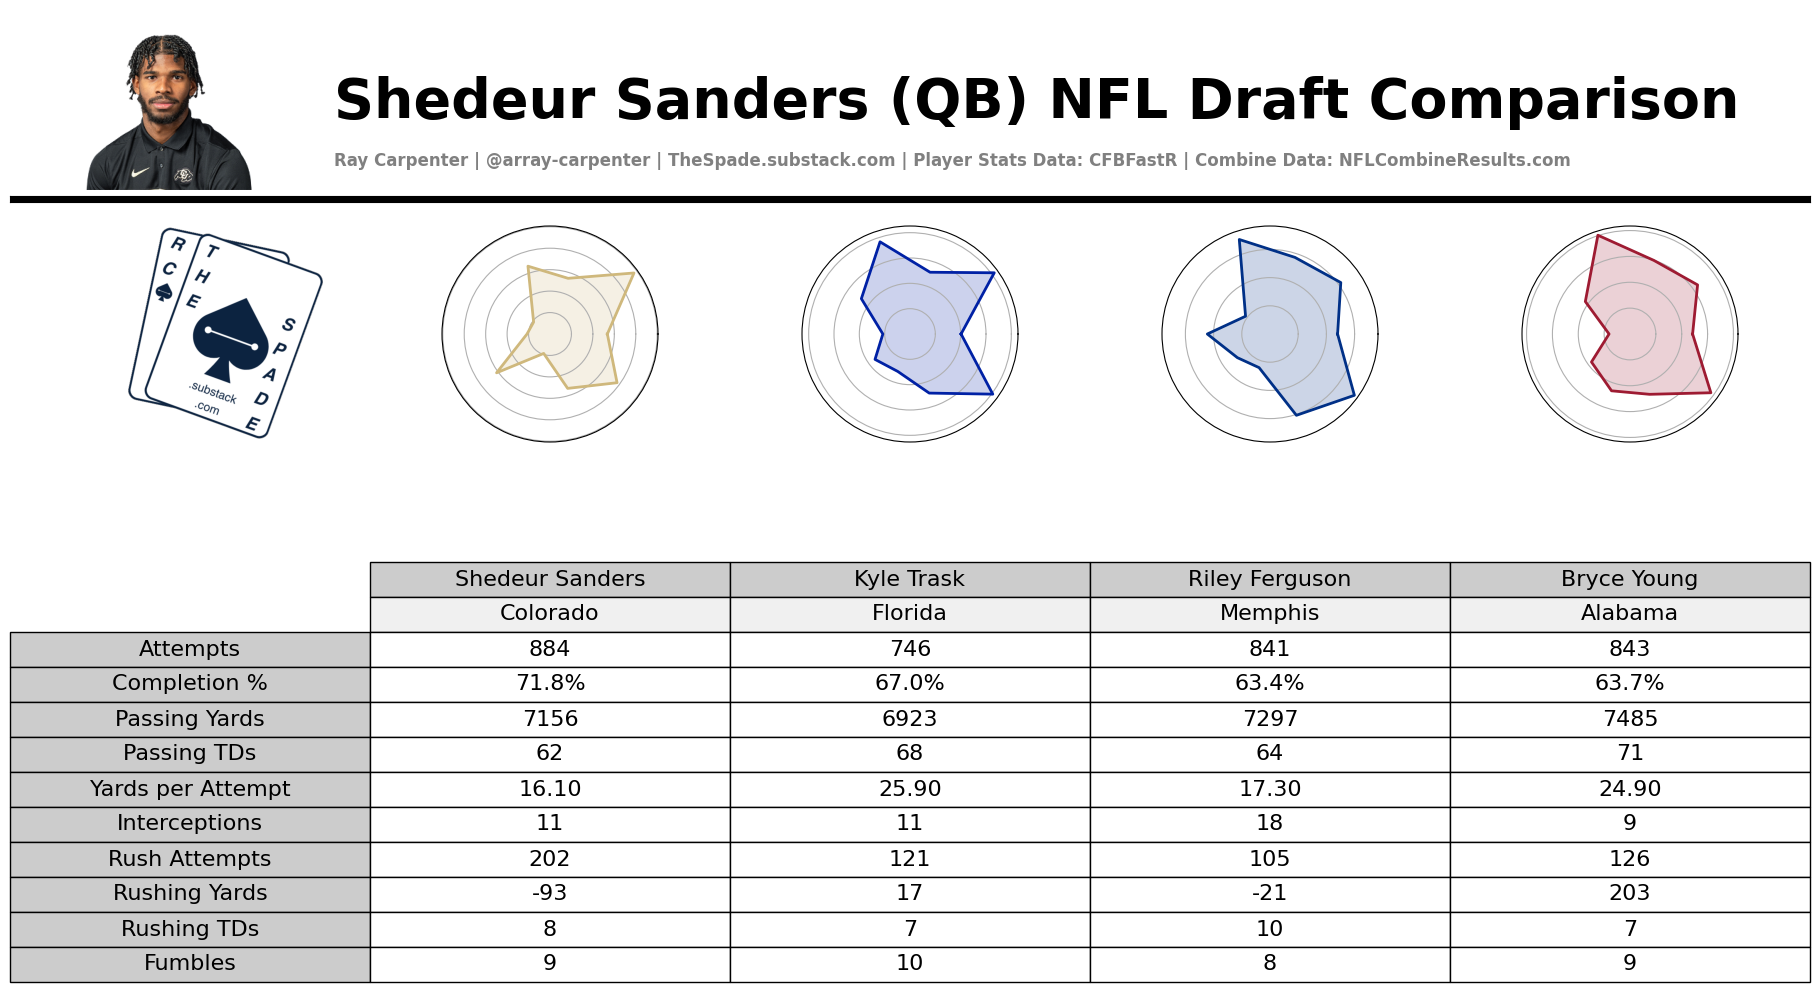

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from scipy.stats import rankdata
from PIL import Image
import urllib.request
import io

# Load datasets
filtered_stats = pd.read_csv("filtered_player_stats_full.csv")
combine_stats = pd.read_csv("combine_data_unique_athlete_id_step4.csv")

# Rename columns in combine_stats to match filtered_stats
combine_stats.rename(columns={"Name": "player", "POS": "position"}, inplace=True)

# Merge position data from combine_stats into filtered_stats
filtered_stats = filtered_stats.merge(
    combine_stats[["player", "position"]],
    on="player",
    how="left"
)

# Manually assign "QB" to Shedeur Sanders since he has no combine data
filtered_stats.loc[filtered_stats["player"] == "Shedeur Sanders", "position"] = "QB"

# Define player and position
input_player = "Shedeur Sanders"

# Get the player's position
player_position = filtered_stats.loc[filtered_stats["player"] == input_player, "position"].values[0]

# Define position-based metrics
POSITION_BASELINES = {
    "QB": [
        "passing_att", "passing_pct", "passing_yds", "passing_td",
        "passing_ypa", "passing_int", "rushing_car", "rushing_yds",
        "rushing_td", "fumbles_fum"
    ]
}

# Keep only players with the same position as the input player
df = filtered_stats[filtered_stats["position"] == player_position]

# Sum player stats across seasons (except percentage-based ones)
df = df.groupby("player").sum().reset_index()

# Correct `passing_pct` to use the average instead of sum
if "passing_pct" in df.columns:
    passing_pct_avg = filtered_stats.groupby("player")["passing_pct"].mean().reset_index()
    df = df.merge(passing_pct_avg, on="player", how="left")
    df["passing_pct"] = df["passing_pct_y"] * 100  # Convert to percentage
    df.drop(columns=["passing_pct_y"], inplace=True)

# Keep only relevant metrics
valid_metrics = [col for col in POSITION_BASELINES.get(player_position, []) if col in df.columns]

# Convert to numeric & replace NaN
df[valid_metrics] = df[valid_metrics].apply(pd.to_numeric, errors="coerce").fillna(0)

# Compute percentile ranks for each metric (normalized to 0-1)
df_percentiles = df.copy()
for metric in valid_metrics:
    df_percentiles[metric] = rankdata(df[metric], method="average") / len(df)

# Get the player's data in percentile form
player_percentiles = df_percentiles[df_percentiles["player"] == input_player][valid_metrics].iloc[0]

# Compute similarity & find top 3 closest comparisons
df_percentiles["similarity"] = df_percentiles[valid_metrics].apply(lambda row: np.linalg.norm(row - player_percentiles), axis=1)
top3 = df_percentiles[df_percentiles["player"] != input_player].nsmallest(3, "similarity").reset_index()

# Get team colors for each player
player_teams = filtered_stats.set_index("player")["team"].to_dict()
comparison_players = [input_player] + top3["player"].tolist()
player_colors = [team_colors.get(player_teams.get(player, ""), "gray") for player in comparison_players]

# Prepare Radar Chart Data
data_for_radar = [player_percentiles.values] + [df_percentiles[df_percentiles["player"] == p][valid_metrics].iloc[0].values for p in top3["player"]]

# Column Name Replacements
COLUMN_RENAME_MAP = {
    "passing_att": "Attempts",
    "passing_pct": "Completion %",
    "passing_yds": "Passing Yards",
    "passing_td": "Passing TDs",
    "passing_ypa": "Yards per Attempt",
    "passing_int": "Interceptions",
    "rushing_car": "Rush Attempts",
    "rushing_yds": "Rushing Yards",
    "rushing_td": "Rushing TDs",
    "fumbles_fum": "Fumbles"
}

# Create the Figure
fig = plt.figure(figsize=(18, 12))
fig.patch.set_facecolor("white")

# Load and Display Shedeur Sanders' Headshot in the Top Left
image_url = "https://a.espncdn.com/combiner/i?img=/i/headshots/college-football/players/full/4432762.png&w=350&h=254"
with urllib.request.urlopen(image_url) as url:
    player_image = Image.open(io.BytesIO(url.read()))

player_img_ax = fig.add_axes([0.01, 0.76, 0.15, 0.15], frameon=False)
player_img_ax.imshow(player_image)
player_img_ax.set_xticks([])
player_img_ax.set_yticks([])

# Title (Bigger and Closer to Headshot)
fig.text(0.18, 0.82, f"{input_player} ({player_position}) NFL Draft Comparison",
         fontsize=40, fontweight="bold", ha="left")  

# Footer (Moved Below the Title)
fig.text(0.18, 0.78, "Ray Carpenter | @array-carpenter | TheSpade.substack.com | Player Stats Data: CFBFastR | Combine Data: NFLCombineResults.com",
         fontsize=12, fontweight="bold", ha="left", color="gray")  

# Black Line Below Title and Image (No Axis Labels)
divider_ax = fig.add_axes([0, 0.75, 1, 0.005])
divider_ax.set_facecolor("black")
divider_ax.set_xticks([])
divider_ax.set_yticks([])

# Restore `1.png` to the Left of the First Radar Chart
logo_path = "1.png"
logo_ax = fig.add_axes([0.03, 0.55, 0.18, 0.18], frameon=False)
logo_img = mpimg.imread(logo_path)
logo_ax.imshow(logo_img)
logo_ax.set_xticks([])
logo_ax.set_yticks([])

# Radar Charts Layout
radar_height = 0.18
radar_width = 0.18
radar_y = 0.55  
col_centers = np.linspace(0.3, 0.9, len(comparison_players))

for i, (player_name, pvec, color) in enumerate(zip(comparison_players, data_for_radar, player_colors)):
    pvec_closed = np.concatenate([pvec, [pvec[0]]])
    angles = np.linspace(0, 2 * np.pi, len(valid_metrics), endpoint=False)
    angles_closed = np.concatenate([angles, [angles[0]]])

    ax_pos = [col_centers[i] - radar_width / 2, radar_y, radar_width, radar_height]
    rax = fig.add_axes(ax_pos, polar=True)

    rax.plot(angles_closed, pvec_closed, color=color, linewidth=2)
    rax.fill(angles_closed, pvec_closed, color=color, alpha=0.2)
    rax.set_yticklabels([])
    rax.set_xticks([])
    rax.set_xticklabels([])

# Extract the most recent team for each player based on athlete_id
# Group by athlete_id and find the row with the maximum year for each player
most_recent_teams = filtered_stats.loc[filtered_stats.groupby("athlete_id")["year"].idxmax()][["athlete_id", "team"]]
most_recent_teams_dict = most_recent_teams.set_index("athlete_id")["team"].to_dict()

# Get the athlete_id for each player in the comparison list
player_athlete_ids = filtered_stats.set_index("player")["athlete_id"].to_dict()
comparison_athlete_ids = [player_athlete_ids.get(player, None) for player in comparison_players]

# Define the desired font size for the table
table_fontsize = 16  # Adjust this value as needed

# Restore Table Below Radar Charts
table_ax = fig.add_axes([0, 0.1, 1, 0.35])
table_ax.set_axis_off()
table = Table(table_ax, bbox=[0, 0, 1, 1])

# Table Data with Renamed Columns
comparison_data = df.set_index("player").loc[comparison_players, valid_metrics]
comparison_data_t = comparison_data.transpose()
comparison_data_t.rename(index=COLUMN_RENAME_MAP, inplace=True)

# Add column headers (player names)
for col_idx, column in enumerate(comparison_data_t.columns):
    cell = table.add_cell(0, col_idx + 1, cell_width, cell_height, text=column, loc="center", facecolor="#cccccc")
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for header cells

# Add team row underneath player names
for col_idx, (player, athlete_id) in enumerate(zip(comparison_data_t.columns, comparison_athlete_ids)):
    team = most_recent_teams_dict.get(athlete_id, "N/A")  # Get the most recent team for the player based on athlete_id
    cell = table.add_cell(1, col_idx + 1, cell_width, cell_height, text=team, loc="center", facecolor="#f0f0f0")
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for team cells

# Add row labels and format values
for row_idx, (row_name, row_vals) in enumerate(comparison_data_t.iterrows()):
    cell = table.add_cell(row_idx + 2, 0, cell_width, cell_height, text=row_name, loc="center", facecolor="#cccccc")
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for row label cells
    for col_idx, val in enumerate(row_vals):
        formatted_val = f"{val:.2f}" if row_name == "Yards per Attempt" else f"{int(val)}" if row_name != "Completion %" else f"{val:.1f}%"
        cell = table.add_cell(row_idx + 2, col_idx + 1, cell_width, cell_height, text=formatted_val, loc="center")
        cell.get_text().set_fontsize(table_fontsize)  # Set font size for data cells
table_ax.axis('off')
table_ax.add_table(table)

plt.show()

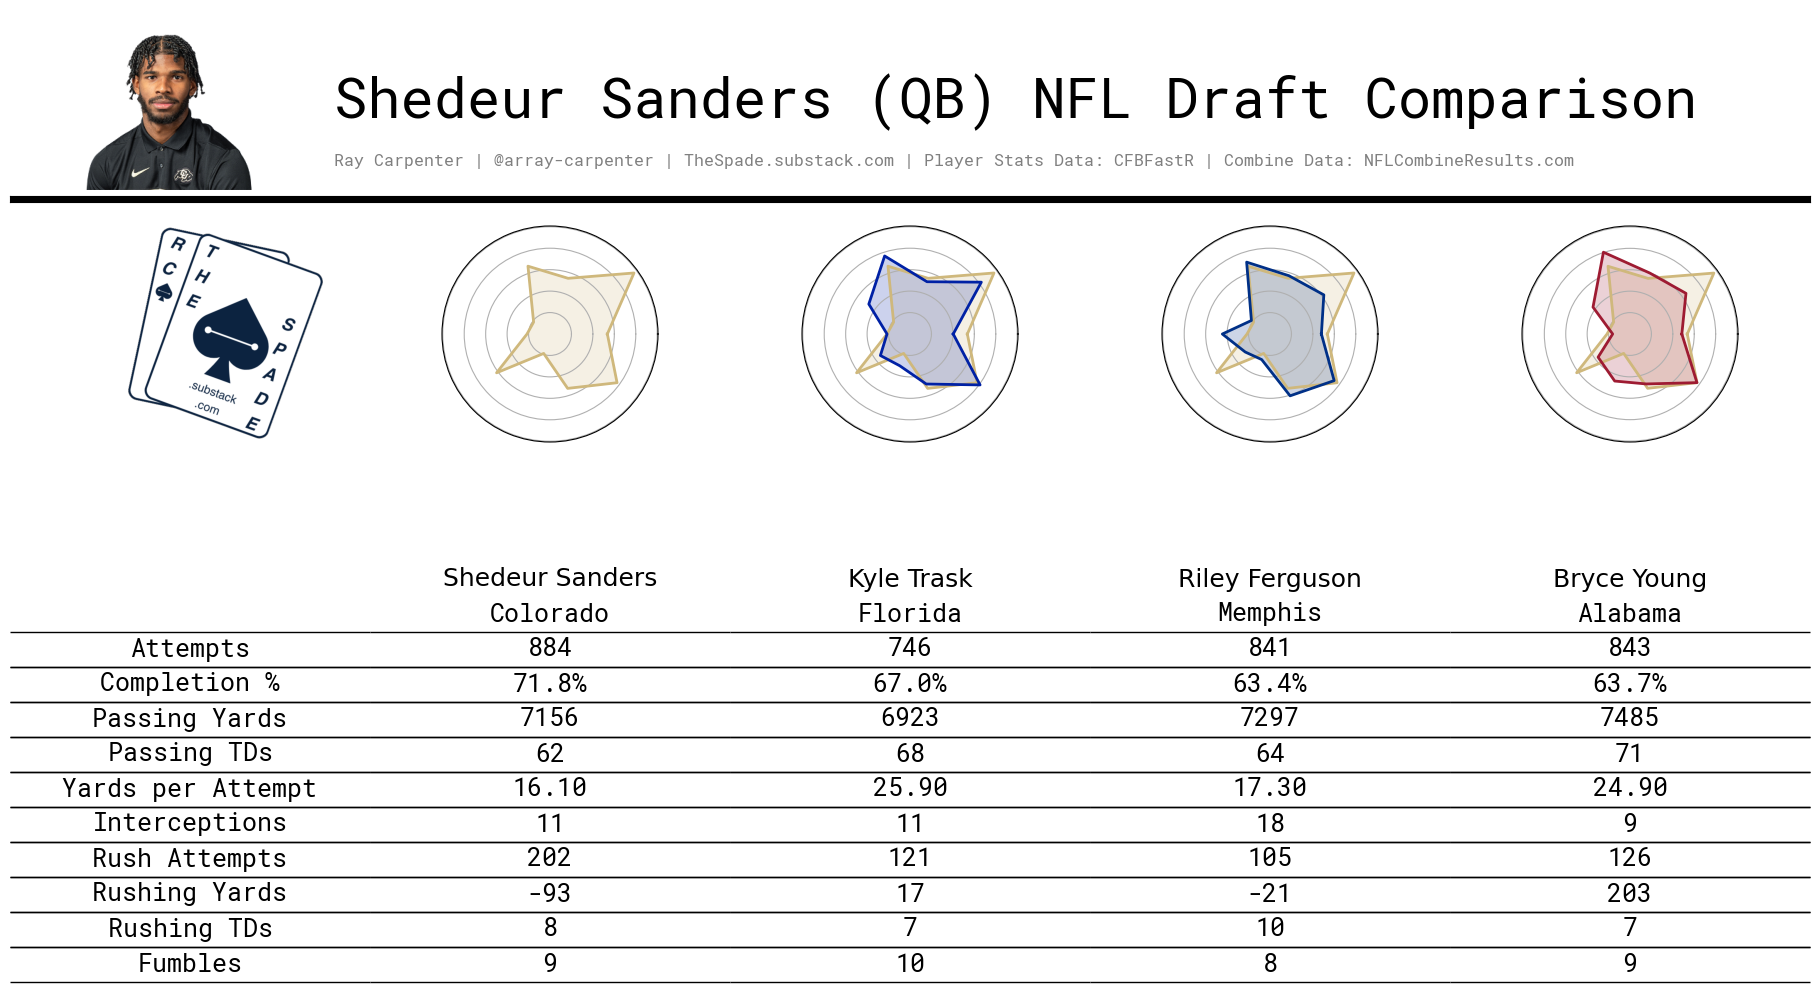

In [315]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import matplotlib.font_manager as fm
import pandas as pd
import matplotlib.image as mpimg
from scipy.stats import rankdata
from PIL import Image
import urllib.request
import io

font_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/nfl-draft-data/Roboto_Mono/RobotoMono-VariableFont_wght.ttf'
roboto= fm.FontProperties(fname=font_path)
# Load datasets
filtered_stats = pd.read_csv("filtered_player_stats_full.csv")
combine_stats = pd.read_csv("combine_data_unique_athlete_id_step4.csv")

# Rename columns in combine_stats to match filtered_stats
combine_stats.rename(columns={"Name": "player", "POS": "position"}, inplace=True)

# Merge position data from combine_stats into filtered_stats
filtered_stats = filtered_stats.merge(
    combine_stats[["player", "position"]],
    on="player",
    how="left"
)

# Manually assign "QB" to Shedeur Sanders since he has no combine data
filtered_stats.loc[filtered_stats["player"] == "Shedeur Sanders", "position"] = "QB"

# Define player and position
input_player = "Shedeur Sanders"

# Get the player's position
player_position = filtered_stats.loc[filtered_stats["player"] == input_player, "position"].values[0]

# Define position-based metrics
POSITION_BASELINES = {
    "QB": [
        "passing_att", "passing_pct", "passing_yds", "passing_td",
        "passing_ypa", "passing_int", "rushing_car", "rushing_yds",
        "rushing_td", "fumbles_fum"
    ]
}

# Keep only players with the same position as the input player
df = filtered_stats[filtered_stats["position"] == player_position]

# Sum player stats across seasons (except percentage-based ones)
df = df.groupby("player").sum().reset_index()

# Correct `passing_pct` to use the average instead of sum
if "passing_pct" in df.columns:
    passing_pct_avg = filtered_stats.groupby("player")["passing_pct"].mean().reset_index()
    df = df.merge(passing_pct_avg, on="player", how="left")
    df["passing_pct"] = df["passing_pct_y"] * 100  # Convert to percentage
    df.drop(columns=["passing_pct_y"], inplace=True)

# Keep only relevant metrics
valid_metrics = [col for col in POSITION_BASELINES.get(player_position, []) if col in df.columns]

# Convert to numeric & replace NaN
df[valid_metrics] = df[valid_metrics].apply(pd.to_numeric, errors="coerce").fillna(0)

# Compute percentile ranks for each metric (normalized to 0-1)
df_percentiles = df.copy()
for metric in valid_metrics:
    df_percentiles[metric] = rankdata(df[metric], method="average") / len(df)

# Get the player's data in percentile form
player_percentiles = df_percentiles[df_percentiles["player"] == input_player][valid_metrics].iloc[0]

# Compute similarity & find top 3 closest comparisons
df_percentiles["similarity"] = df_percentiles[valid_metrics].apply(lambda row: np.linalg.norm(row - player_percentiles), axis=1)
top3 = df_percentiles[df_percentiles["player"] != input_player].nsmallest(3, "similarity").reset_index()

# Get team colors for each player
player_teams = filtered_stats.set_index("player")["team"].to_dict()
comparison_players = [input_player] + top3["player"].tolist()
player_colors = [team_colors.get(player_teams.get(player, ""), "gray") for player in comparison_players]

# Prepare Radar Chart Data
data_for_radar = [player_percentiles.values] + [df_percentiles[df_percentiles["player"] == p][valid_metrics].iloc[0].values for p in top3["player"]]

# Column Name Replacements
COLUMN_RENAME_MAP = {
    "passing_att": "Attempts",
    "passing_pct": "Completion %",
    "passing_yds": "Passing Yards",
    "passing_td": "Passing TDs",
    "passing_ypa": "Yards per Attempt",
    "passing_int": "Interceptions",
    "rushing_car": "Rush Attempts",
    "rushing_yds": "Rushing Yards",
    "rushing_td": "Rushing TDs",
    "fumbles_fum": "Fumbles"
}

# Create the Figure
fig = plt.figure(figsize=(18, 12))
fig.patch.set_facecolor("white")

# Load and Display Shedeur Sanders' Headshot in the Top Left
image_url = "https://a.espncdn.com/combiner/i?img=/i/headshots/college-football/players/full/4432762.png&w=350&h=254"
with urllib.request.urlopen(image_url) as url:
    player_image = Image.open(io.BytesIO(url.read()))

player_img_ax = fig.add_axes([0.01, 0.76, 0.15, 0.15], frameon=False)
player_img_ax.imshow(player_image)
player_img_ax.set_xticks([])
player_img_ax.set_yticks([])

# Title (Bigger and Closer to Headshot)
fig.text(0.18, 0.82, f"{input_player} ({player_position}) NFL Draft Comparison",
         fontsize=40, fontweight="bold", ha="left",fontproperties=roboto)  

# Footer (Moved Below the Title)
fig.text(0.18, 0.78, "Ray Carpenter | @array-carpenter | TheSpade.substack.com | Player Stats Data: CFBFastR | Combine Data: NFLCombineResults.com",
         fontsize=12, fontweight="bold", ha="left", color="gray",fontproperties=roboto)  

# Black Line Below Title and Image (No Axis Labels)
divider_ax = fig.add_axes([0, 0.75, 1, 0.005])
divider_ax.set_facecolor("black")
divider_ax.set_xticks([])
divider_ax.set_yticks([])

# Restore `1.png` to the Left of the First Radar Chart
logo_path = "1.png"
logo_ax = fig.add_axes([0.03, 0.55, 0.18, 0.18], frameon=False)
logo_img = mpimg.imread(logo_path)
logo_ax.imshow(logo_img)
logo_ax.set_xticks([])
logo_ax.set_yticks([])

# Radar Charts Layout
radar_height = 0.18
radar_width = 0.18
radar_y = 0.55  
col_centers = np.linspace(0.3, 0.9, len(comparison_players))

for i, player_name in enumerate(comparison_players):
    ax_pos = [col_centers[i] - radar_width / 2, radar_y, radar_width, radar_height]
    rax = fig.add_axes(ax_pos, polar=True)

    angles = np.linspace(0, 2 * np.pi, len(valid_metrics), endpoint=False)
    angles_closed = np.concatenate([angles, [angles[0]]])

    # Always plot input_player's data (first player)
    pvec_closed = np.concatenate([data_for_radar[0], [data_for_radar[0][0]]])
    rax.plot(angles_closed, pvec_closed, color=player_colors[0], linewidth=2, label=input_player)
    rax.fill(angles_closed, pvec_closed, color=player_colors[0], alpha=0.2)

    # Plot current player's data if it's not the first player
    if i > 0:
        pvec_closed = np.concatenate([data_for_radar[i], [data_for_radar[i][0]]])
        rax.plot(angles_closed, pvec_closed, color=player_colors[i], linewidth=2, label=player_name)
        rax.fill(angles_closed, pvec_closed, color=player_colors[i], alpha=0.2)

    rax.set_yticklabels([])
    rax.set_xticks([])
    rax.set_xticklabels([])

# Extract the most recent team for each player based on athlete_id
# Group by athlete_id and find the row with the maximum year for each player
most_recent_teams = filtered_stats.loc[filtered_stats.groupby("athlete_id")["year"].idxmax()][["athlete_id", "team"]]
most_recent_teams_dict = most_recent_teams.set_index("athlete_id")["team"].to_dict()

# Get the athlete_id for each player in the comparison list
player_athlete_ids = filtered_stats.set_index("player")["athlete_id"].to_dict()
comparison_athlete_ids = [player_athlete_ids.get(player, None) for player in comparison_players]

# Define the desired font size for the table
table_fontsize = 18  # Adjust this value as needed

# Restore Table Below Radar Charts
table_ax = fig.add_axes([0, 0.1, 1, 0.35])
table_ax.set_axis_off()
table = Table(table_ax, bbox=[0, 0, 1, 1])

# Table Data with Renamed Columns
comparison_data = df.set_index("player").loc[comparison_players, valid_metrics]
comparison_data_t = comparison_data.transpose()
comparison_data_t.rename(index=COLUMN_RENAME_MAP, inplace=True)

# Add column headers (player names)
for col_idx, column in enumerate(comparison_data_t.columns):
    cell = table.add_cell(0, col_idx + 1, cell_width, cell_height, text=column, loc="center", facecolor="#cccccc")
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for header cells
    cell.visible_edges=''

# Add team row underneath player names
for col_idx, (player, athlete_id) in enumerate(zip(comparison_data_t.columns, comparison_athlete_ids)):
    team = most_recent_teams_dict.get(athlete_id, "N/A")  # Get the most recent team for the player based on athlete_id
    cell = table.add_cell(1, col_idx + 1, cell_width, cell_height, text=team, loc="center", facecolor="#f0f0f0",fontproperties=roboto)
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for team cells
    cell.visible_edges=''

# Add row labels and format values
for row_idx, (row_name, row_vals) in enumerate(comparison_data_t.iterrows()):
    cell = table.add_cell(row_idx + 2, 0, cell_width, cell_height, text=row_name, loc="center", facecolor="#cccccc",fontproperties=roboto)
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for row label cells
    cell.visible_edges = "horizontal" 
    for col_idx, val in enumerate(row_vals):
        formatted_val = f"{val:.2f}" if row_name == "Yards per Attempt" else f"{int(val)}" if row_name != "Completion %" else f"{val:.1f}%"
        cell = table.add_cell(row_idx + 2, col_idx + 1, cell_width, cell_height, text=formatted_val, loc="center",fontproperties=roboto)
        cell.get_text().set_fontsize(table_fontsize)  # Set font size for data cells
        cell.visible_edges='horizontal'
table_ax.axis('off')
table_ax.add_table(table)

plt.show()

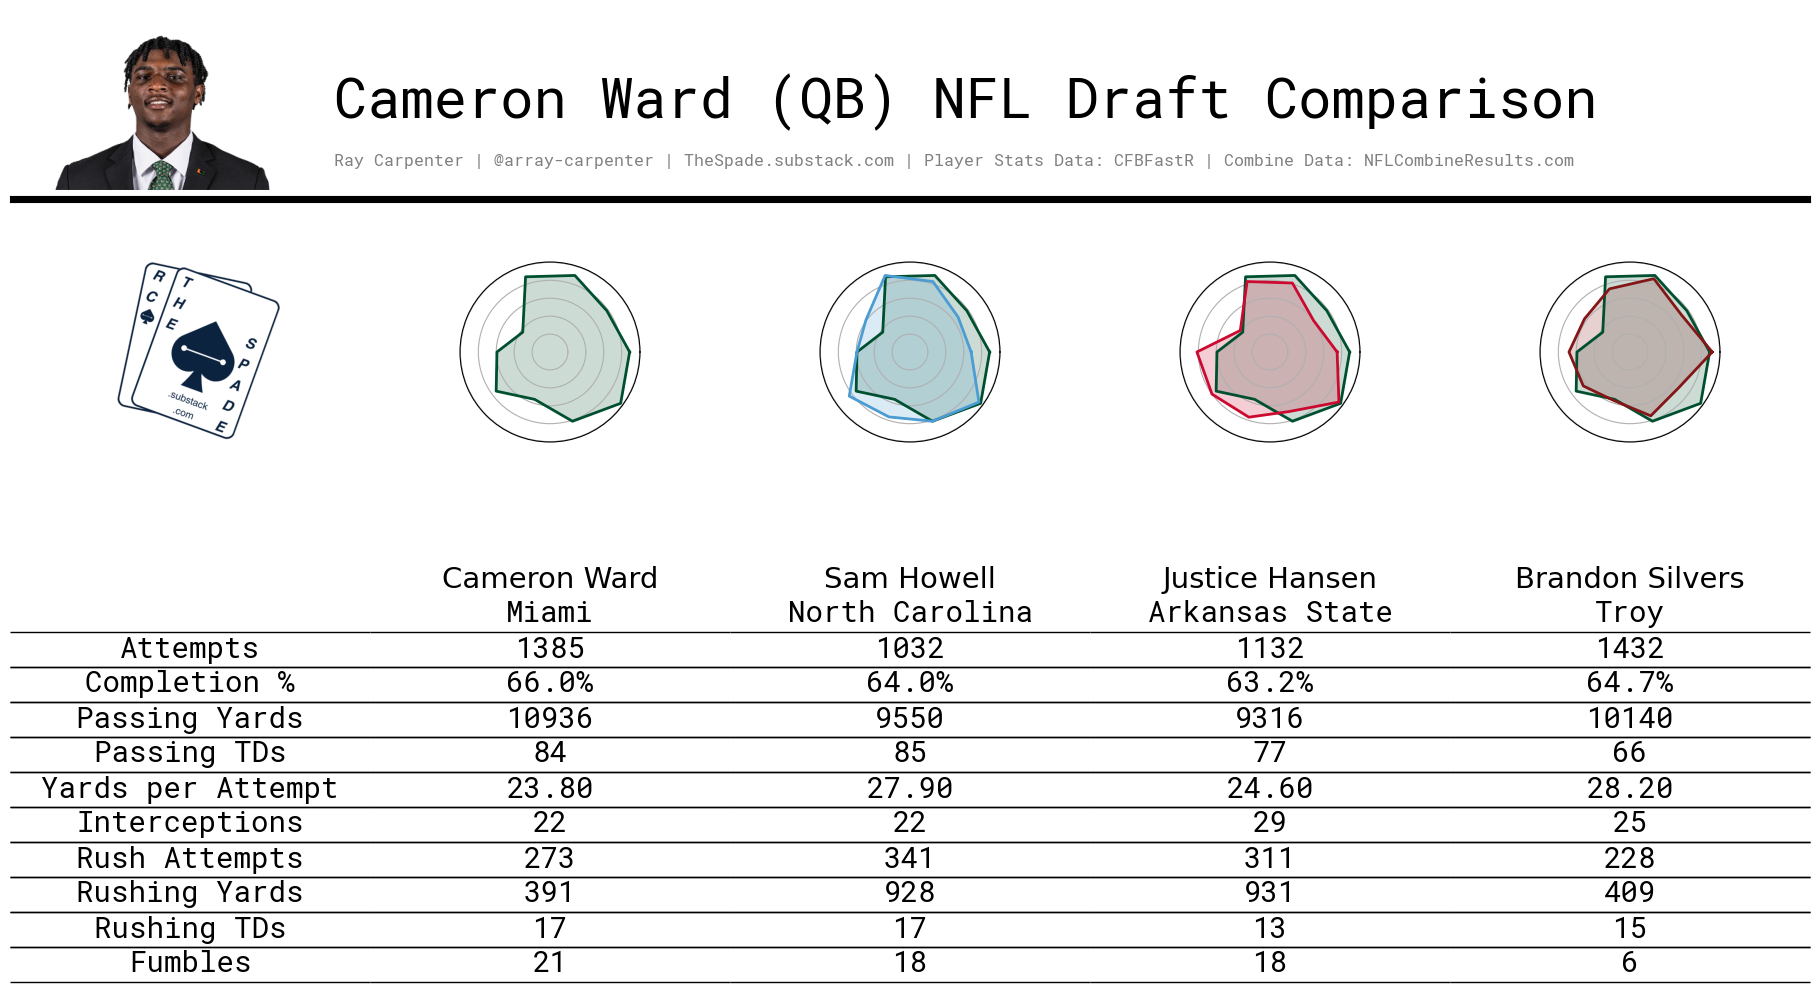

In [343]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import matplotlib.font_manager as fm
import pandas as pd
import matplotlib.image as mpimg
from scipy.stats import rankdata
from PIL import Image
import urllib.request
import io

font_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/nfl-draft-data/Roboto_Mono/RobotoMono-VariableFont_wght.ttf'
roboto= fm.FontProperties(fname=font_path)
italic_roboto = fm.FontProperties(fname="C:/Users/RaymondCarpenter/Documents/GitHub/nfl-draft-data/Roboto_Mono/RobotoMono-Italic-VariableFont_wght.ttf")

# Load datasets
filtered_stats = pd.read_csv("filtered_player_stats_full.csv")
combine_stats = pd.read_csv("combine_data_unique_athlete_id_step4.csv")

# Rename columns in combine_stats to match filtered_stats
combine_stats.rename(columns={"Name": "player", "POS": "position"}, inplace=True)

# Merge position data from combine_stats into filtered_stats
filtered_stats = filtered_stats.merge(
    combine_stats[["player", "position"]],
    on="player",
    how="left"
)

# Manually assign "QB" to Shedeur Sanders since he has no combine data
filtered_stats.loc[filtered_stats["player"] == "Cameron Ward", "position"] = "QB"

# Define player and position
input_player = "Cameron Ward"

# Get the player's position
player_position = filtered_stats.loc[filtered_stats["player"] == input_player, "position"].values[0]

# Define position-based metrics
POSITION_BASELINES = {
    "QB": [
        "passing_att", "passing_pct", "passing_yds", "passing_td",
        "passing_ypa", "passing_int", "rushing_car", "rushing_yds",
        "rushing_td", "fumbles_fum"
    ]
}

# Keep only players with the same position as the input player
df = filtered_stats[filtered_stats["position"] == player_position]

# Sum player stats across seasons (except percentage-based ones)
df = df.groupby("player").sum().reset_index()

# Correct `passing_pct` to use the average instead of sum
if "passing_pct" in df.columns:
    passing_pct_avg = filtered_stats.groupby("player")["passing_pct"].mean().reset_index()
    df = df.merge(passing_pct_avg, on="player", how="left")
    df["passing_pct"] = df["passing_pct_y"] * 100  # Convert to percentage
    df.drop(columns=["passing_pct_y"], inplace=True)

# Keep only relevant metrics
valid_metrics = [col for col in POSITION_BASELINES.get(player_position, []) if col in df.columns]

# Convert to numeric & replace NaN
df[valid_metrics] = df[valid_metrics].apply(pd.to_numeric, errors="coerce").fillna(0)

# Compute percentile ranks for each metric (normalized to 0-1)
df_percentiles = df.copy()
for metric in valid_metrics:
    df_percentiles[metric] = rankdata(df[metric], method="average") / len(df)

# Get the player's data in percentile form
player_percentiles = df_percentiles[df_percentiles["player"] == input_player][valid_metrics].iloc[0]

# Compute similarity & find top 3 closest comparisons
df_percentiles["similarity"] = df_percentiles[valid_metrics].apply(lambda row: np.linalg.norm(row - player_percentiles), axis=1)
top3 = df_percentiles[df_percentiles["player"] != input_player].nsmallest(3, "similarity").reset_index()

# Ensure we get the player's latest school from the most recent year in the dataset
latest_teams = filtered_stats.loc[filtered_stats.groupby("player")["year"].idxmax(), ["player", "team"]]
latest_teams_dict = latest_teams.set_index("player")["team"].to_dict()

# Assign colors based on the most recent team in the dataset
comparison_players = [input_player] + top3["player"].tolist()
player_colors = [team_colors.get(latest_teams_dict.get(player, ""), "gray") for player in comparison_players]

# Prepare Radar Chart Data
data_for_radar = [player_percentiles.values] + [df_percentiles[df_percentiles["player"] == p][valid_metrics].iloc[0].values for p in top3["player"]]

# Column Name Replacements
COLUMN_RENAME_MAP = {
    "passing_att": "Attempts",
    "passing_pct": "Completion %",
    "passing_yds": "Passing Yards",
    "passing_td": "Passing TDs",
    "passing_ypa": "Yards per Attempt",
    "passing_int": "Interceptions",
    "rushing_car": "Rush Attempts",
    "rushing_yds": "Rushing Yards",
    "rushing_td": "Rushing TDs",
    "fumbles_fum": "Fumbles"
}

# Create the Figure
fig = plt.figure(figsize=(18, 12))
fig.patch.set_facecolor("white")

# Load and Display Headshot in the Top Left
image_url = "https://a.espncdn.com/combiner/i?img=/i/headshots/college-football/players/full/4688380.png&w=350&h=254"
with urllib.request.urlopen(image_url) as url:
    player_image = Image.open(io.BytesIO(url.read()))

player_img_ax = fig.add_axes([0.01, 0.76, 0.15, 0.15], frameon=False)
player_img_ax.imshow(player_image)
player_img_ax.set_xticks([])
player_img_ax.set_yticks([])

# Title (Bigger and Closer to Headshot)
fig.text(0.18, 0.82, f"{input_player} ({player_position}) NFL Draft Comparison",
         fontsize=40, fontweight="bold", ha="left",fontproperties=roboto)  

# Footer (Moved Below the Title)
fig.text(0.18, 0.78, "Ray Carpenter | @array-carpenter | TheSpade.substack.com | Player Stats Data: CFBFastR | Combine Data: NFLCombineResults.com",
         fontsize=12, fontweight="bold", ha="left", color="gray",fontproperties=roboto)  

# Black Line Below Title and Image (No Axis Labels)
divider_ax = fig.add_axes([0, 0.75, 1, 0.005])
divider_ax.set_facecolor("black")
divider_ax.set_xticks([])
divider_ax.set_yticks([])

# Restore `1.png` to the Left of the First Radar Chart
logo_path = "1.png"
logo_ax = fig.add_axes([0.03, 0.55, 0.15, 0.15], frameon=False)
logo_img = mpimg.imread(logo_path)
logo_ax.imshow(logo_img)
logo_ax.set_xticks([])
logo_ax.set_yticks([])

# Radar Charts Layout
radar_height = 0.15
radar_width = 0.15
radar_y = 0.55  
col_centers = np.linspace(0.3, 0.9, len(comparison_players))

for i, player_name in enumerate(comparison_players):
    ax_pos = [col_centers[i] - radar_width / 2, radar_y, radar_width, radar_height]
    rax = fig.add_axes(ax_pos, polar=True)

    angles = np.linspace(0, 2 * np.pi, len(valid_metrics), endpoint=False)
    angles_closed = np.concatenate([angles, [angles[0]]])

    # Always plot input_player's data (first player)
    pvec_closed = np.concatenate([data_for_radar[0], [data_for_radar[0][0]]])
    rax.plot(angles_closed, pvec_closed, color=player_colors[0], linewidth=2, label=input_player)
    rax.fill(angles_closed, pvec_closed, color=player_colors[0], alpha=0.2)

    # Plot current player's data if it's not the first player
    if i > 0:
        pvec_closed = np.concatenate([data_for_radar[i], [data_for_radar[i][0]]])
        rax.plot(angles_closed, pvec_closed, color=player_colors[i], linewidth=2, label=player_name)
        rax.fill(angles_closed, pvec_closed, color=player_colors[i], alpha=0.2)

    rax.set_yticklabels([])
    rax.set_xticks([])
    rax.set_xticklabels([])

# Extract the most recent team for each player based on athlete_id
# Group by athlete_id and find the row with the maximum year for each player
most_recent_teams = filtered_stats.loc[filtered_stats.groupby("athlete_id")["year"].idxmax()][["athlete_id", "team"]]
most_recent_teams_dict = most_recent_teams.set_index("athlete_id")["team"].to_dict()

# Get the athlete_id for each player in the comparison list
player_athlete_ids = filtered_stats.set_index("player")["athlete_id"].to_dict()
comparison_athlete_ids = [player_athlete_ids.get(player, None) for player in comparison_players]

# Define the desired font size for the table
table_fontsize = 22  # Adjust this value as needed

# Restore Table Below Radar Charts
table_ax = fig.add_axes([0, 0.1, 1, 0.35])
table_ax.set_axis_off()
table = Table(table_ax, bbox=[0, 0, 1, 1])

# Table Data with Renamed Columns
comparison_data = df.set_index("player").loc[comparison_players, valid_metrics]
comparison_data_t = comparison_data.transpose()
comparison_data_t.rename(index=COLUMN_RENAME_MAP, inplace=True)

# Add column headers (player names)
for col_idx, column in enumerate(comparison_data_t.columns):
    cell = table.add_cell(0, col_idx + 1, cell_width, cell_height, text=column, loc="center", facecolor="#cccccc")
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for header cells
    cell.visible_edges=''

# Add team row underneath player names
for col_idx, (player, athlete_id) in enumerate(zip(comparison_data_t.columns, comparison_athlete_ids)):
    team = most_recent_teams_dict.get(athlete_id, "N/A")  # Get the most recent team for the player based on athlete_id
    cell = table.add_cell(1, col_idx + 1, cell_width, cell_height, text=team, loc="center", facecolor="#f0f0f0",fontproperties=roboto)
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for team cells
    cell.visible_edges=''

# Add row labels and format values
for row_idx, (row_name, row_vals) in enumerate(comparison_data_t.iterrows()):
    cell = table.add_cell(row_idx + 2, 0, cell_width, cell_height, text=row_name, loc="center", facecolor="#cccccc",fontproperties=roboto)
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for row label cells
    cell.visible_edges = "horizontal" 
    for col_idx, val in enumerate(row_vals):
        formatted_val = f"{val:.2f}" if row_name == "Yards per Attempt" else f"{int(val)}" if row_name != "Completion %" else f"{val:.1f}%"
        cell = table.add_cell(row_idx + 2, col_idx + 1, cell_width, cell_height, text=formatted_val, loc="center",fontproperties=roboto)
        cell.get_text().set_fontsize(table_fontsize)  # Set font size for data cells
        cell.visible_edges='horizontal'
table_ax.axis('off')
table_ax.add_table(table)

plt.show()

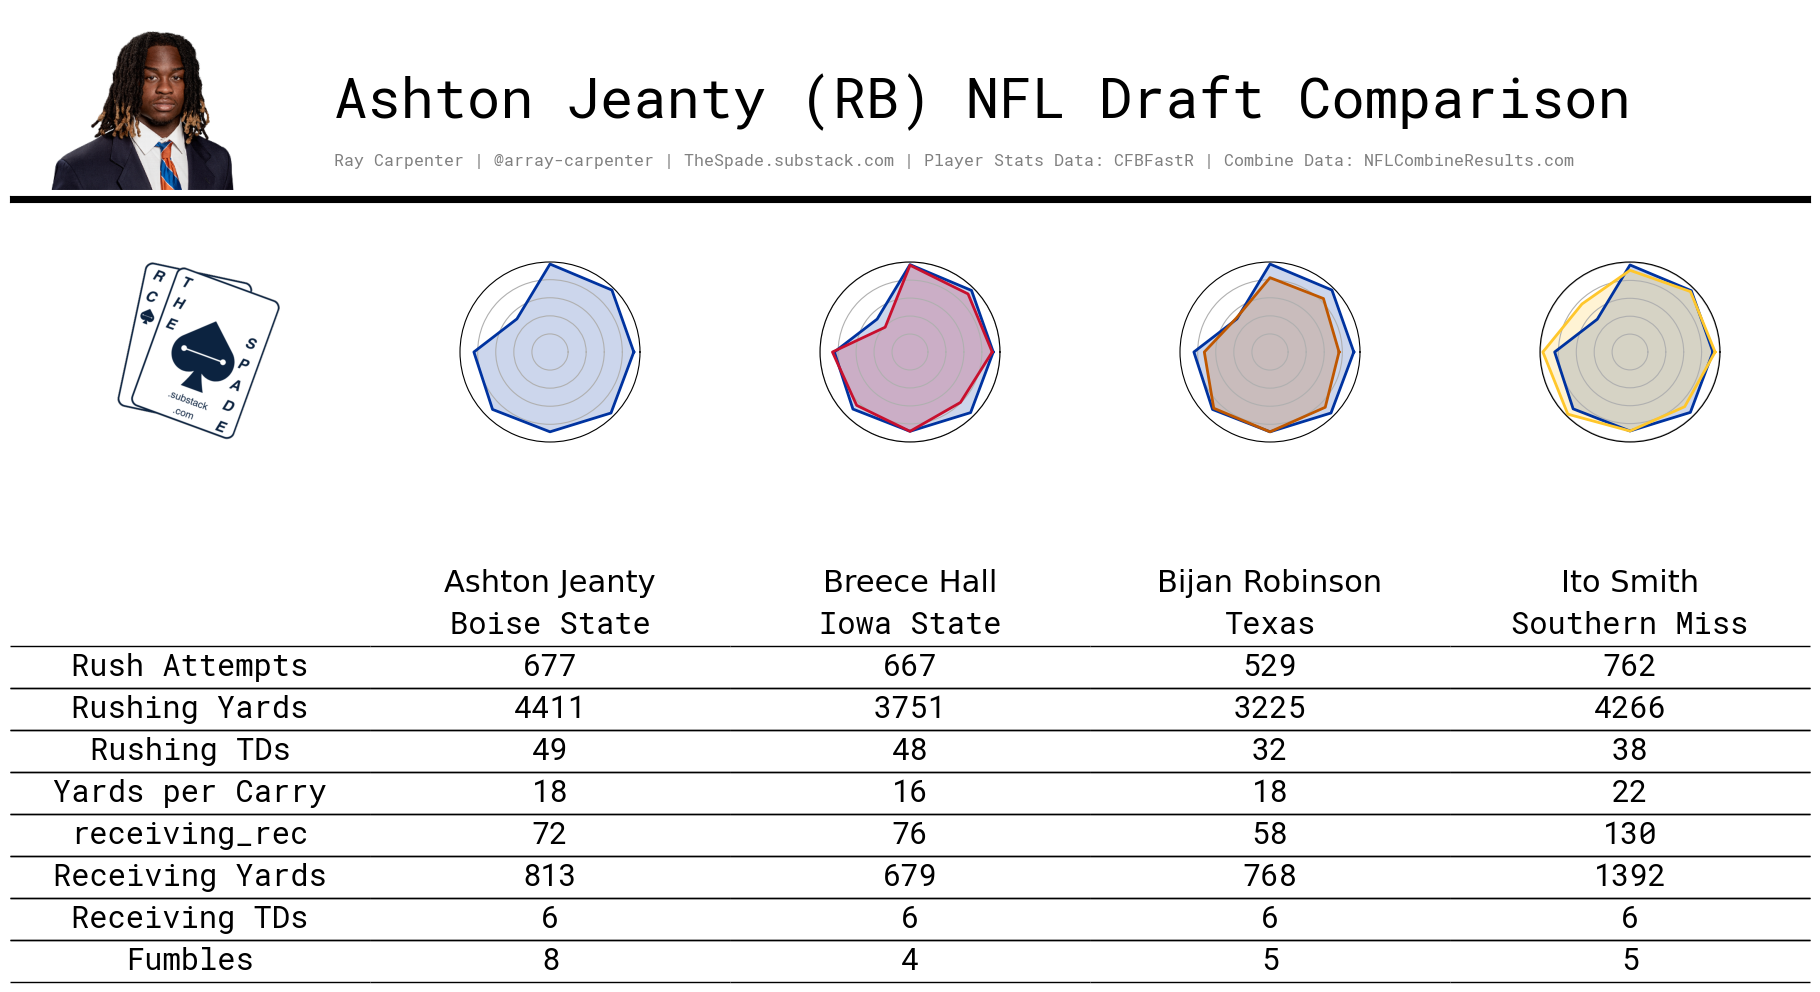

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import matplotlib.font_manager as fm
import pandas as pd
import matplotlib.image as mpimg
from scipy.stats import rankdata
from PIL import Image
import urllib.request
import io

font_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/nfl-draft-data/Roboto_Mono/RobotoMono-VariableFont_wght.ttf'
roboto= fm.FontProperties(fname=font_path)
italic_roboto = fm.FontProperties(fname="C:/Users/RaymondCarpenter/Documents/GitHub/nfl-draft-data/Roboto_Mono/RobotoMono-Italic-VariableFont_wght.ttf")

# Load datasets
filtered_stats = pd.read_csv("filtered_player_stats_full.csv")
combine_stats = pd.read_csv("combine_data_unique_athlete_id_step4.csv")

# Rename columns in combine_stats to match filtered_stats
combine_stats.rename(columns={"Name": "player", "POS": "position"}, inplace=True)

# Merge position data from combine_stats into filtered_stats
filtered_stats = filtered_stats.merge(
    combine_stats[["player", "position"]],
    on="player",
    how="left"
)

# Manually assign "QB" to Shedeur Sanders since he has no combine data
filtered_stats.loc[filtered_stats["player"] == "Ashton Jeanty", "position"] = "RB"

# Define player and position
input_player = "Ashton Jeanty"

# Get the player's position
player_position = filtered_stats.loc[filtered_stats["player"] == input_player, "position"].values[0]

# Define position-based metrics
POSITION_BASELINES = {
    "QB": [
        "passing_att", "passing_pct", "passing_yds", "passing_td",
        "passing_ypa", "passing_int", "rushing_car", "rushing_yds",
        "rushing_td", "fumbles_fum"
    ],
        "RB": [
        "rushing_car", "rushing_yds", "rushing_td", "rushing_ypc",
        "receiving_rec", "receiving_yds", "receiving_td", "fumbles_fum"
    ]
}

# Keep only players with the same position as the input player
df = filtered_stats[filtered_stats["position"] == player_position]

# Sum player stats across seasons (except percentage-based ones)
df = df.groupby("player").sum().reset_index()

# Correct `passing_pct` to use the average instead of sum
if "passing_pct" in df.columns:
    passing_pct_avg = filtered_stats.groupby("player")["passing_pct"].mean().reset_index()
    df = df.merge(passing_pct_avg, on="player", how="left")
    df["passing_pct"] = df["passing_pct_y"] * 100  # Convert to percentage
    df.drop(columns=["passing_pct_y"], inplace=True)

# Keep only relevant metrics
valid_metrics = [col for col in POSITION_BASELINES.get(player_position, []) if col in df.columns]

# Convert to numeric & replace NaN
df[valid_metrics] = df[valid_metrics].apply(pd.to_numeric, errors="coerce").fillna(0)

# Compute percentile ranks for each metric (normalized to 0-1)
df_percentiles = df.copy()
for metric in valid_metrics:
    df_percentiles[metric] = rankdata(df[metric], method="average") / len(df)

# Get the player's data in percentile form
player_percentiles = df_percentiles[df_percentiles["player"] == input_player][valid_metrics].iloc[0]

# Compute similarity & find top 3 closest comparisons
df_percentiles["similarity"] = df_percentiles[valid_metrics].apply(lambda row: np.linalg.norm(row - player_percentiles), axis=1)
top3 = df_percentiles[df_percentiles["player"] != input_player].nsmallest(3, "similarity").reset_index()

# Ensure we get the player's latest school from the most recent year in the dataset
latest_teams = filtered_stats.loc[filtered_stats.groupby("player")["year"].idxmax(), ["player", "team"]]
latest_teams_dict = latest_teams.set_index("player")["team"].to_dict()

# Assign colors based on the most recent team in the dataset
comparison_players = [input_player] + top3["player"].tolist()
player_colors = [team_colors.get(latest_teams_dict.get(player, ""), "gray") for player in comparison_players]

# Prepare Radar Chart Data
data_for_radar = [player_percentiles.values] + [df_percentiles[df_percentiles["player"] == p][valid_metrics].iloc[0].values for p in top3["player"]]

# Column Name Replacements
COLUMN_RENAME_MAP = {
    "passing_att": "Attempts",
    "passing_pct": "Completion %",
    "passing_yds": "Passing Yards",
    "passing_td": "Passing TDs",
    "passing_ypa": "Yards per Attempt",
    "passing_int": "Interceptions",
    "rushing_car": "Rush Attempts",
    "rushing_yds": "Rushing Yards",
    "rushing_td": "Rushing TDs",
    "rushing_ypc": "Yards per Carry",
    "receiving_yds": "Receiving Yards",
    "receiving_td": "Receiving TDs",
    "fumbles_fum": "Fumbles"
}

# Create the Figure
fig = plt.figure(figsize=(18, 12))
fig.patch.set_facecolor("white")

# Load and Display Headshot in the Top Left
image_url = "https://a.espncdn.com/combiner/i?img=/i/headshots/college-football/players/full/4890973.png&w=350&h=254"
with urllib.request.urlopen(image_url) as url:
    player_image = Image.open(io.BytesIO(url.read()))

player_img_ax = fig.add_axes([0.01, 0.76, 0.15, 0.15], frameon=False)
player_img_ax.imshow(player_image)
player_img_ax.set_xticks([])
player_img_ax.set_yticks([])

# Title (Bigger and Closer to Headshot)
fig.text(0.18, 0.82, f"{input_player} ({player_position}) NFL Draft Comparison",
         fontsize=40, fontweight="bold", ha="left",fontproperties=roboto)  

# Footer (Moved Below the Title)
fig.text(0.18, 0.78, "Ray Carpenter | @array-carpenter | TheSpade.substack.com | Player Stats Data: CFBFastR | Combine Data: NFLCombineResults.com",
         fontsize=12, fontweight="bold", ha="left", color="gray",fontproperties=roboto)  

# Black Line Below Title and Image (No Axis Labels)
divider_ax = fig.add_axes([0, 0.75, 1, 0.005])
divider_ax.set_facecolor("black")
divider_ax.set_xticks([])
divider_ax.set_yticks([])

# Restore `1.png` to the Left of the First Radar Chart
logo_path = "1.png"
logo_ax = fig.add_axes([0.03, 0.55, 0.15, 0.15], frameon=False)
logo_img = mpimg.imread(logo_path)
logo_ax.imshow(logo_img)
logo_ax.set_xticks([])
logo_ax.set_yticks([])

# Radar Charts Layout
radar_height = 0.15
radar_width = 0.15
radar_y = 0.55  
col_centers = np.linspace(0.3, 0.9, len(comparison_players))

for i, player_name in enumerate(comparison_players):
    ax_pos = [col_centers[i] - radar_width / 2, radar_y, radar_width, radar_height]
    rax = fig.add_axes(ax_pos, polar=True)

    angles = np.linspace(0, 2 * np.pi, len(valid_metrics), endpoint=False)
    angles_closed = np.concatenate([angles, [angles[0]]])

    # Always plot input_player's data (first player)
    pvec_closed = np.concatenate([data_for_radar[0], [data_for_radar[0][0]]])
    rax.plot(angles_closed, pvec_closed, color=player_colors[0], linewidth=2, label=input_player)
    rax.fill(angles_closed, pvec_closed, color=player_colors[0], alpha=0.2)

    # Plot current player's data if it's not the first player
    if i > 0:
        pvec_closed = np.concatenate([data_for_radar[i], [data_for_radar[i][0]]])
        rax.plot(angles_closed, pvec_closed, color=player_colors[i], linewidth=2, label=player_name)
        rax.fill(angles_closed, pvec_closed, color=player_colors[i], alpha=0.2)

    rax.set_yticklabels([])
    rax.set_xticks([])
    rax.set_xticklabels([])

# Extract the most recent team for each player based on athlete_id
# Group by athlete_id and find the row with the maximum year for each player
most_recent_teams = filtered_stats.loc[filtered_stats.groupby("athlete_id")["year"].idxmax()][["athlete_id", "team"]]
most_recent_teams_dict = most_recent_teams.set_index("athlete_id")["team"].to_dict()

# Get the athlete_id for each player in the comparison list
player_athlete_ids = filtered_stats.set_index("player")["athlete_id"].to_dict()
comparison_athlete_ids = [player_athlete_ids.get(player, None) for player in comparison_players]

# Define the desired font size for the table
table_fontsize = 22  # Adjust this value as needed

# Restore Table Below Radar Charts
table_ax = fig.add_axes([0, 0.1, 1, 0.35])
table_ax.set_axis_off()
table = Table(table_ax, bbox=[0, 0, 1, 1])

# Table Data with Renamed Columns
comparison_data = df.set_index("player").loc[comparison_players, valid_metrics]
comparison_data_t = comparison_data.transpose()
comparison_data_t.rename(index=COLUMN_RENAME_MAP, inplace=True)

# Add column headers (player names)
for col_idx, column in enumerate(comparison_data_t.columns):
    cell = table.add_cell(0, col_idx + 1, cell_width, cell_height, text=column, loc="center", facecolor="#cccccc")
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for header cells
    cell.visible_edges=''

# Add team row underneath player names
for col_idx, (player, athlete_id) in enumerate(zip(comparison_data_t.columns, comparison_athlete_ids)):
    team = most_recent_teams_dict.get(athlete_id, "N/A")  # Get the most recent team for the player based on athlete_id
    cell = table.add_cell(1, col_idx + 1, cell_width, cell_height, text=team, loc="center", facecolor="#f0f0f0",fontproperties=roboto)
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for team cells
    cell.visible_edges=''

# Add row labels and format values
for row_idx, (row_name, row_vals) in enumerate(comparison_data_t.iterrows()):
    cell = table.add_cell(row_idx + 2, 0, cell_width, cell_height, text=row_name, loc="center", facecolor="#cccccc",fontproperties=roboto)
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for row label cells
    cell.visible_edges = "horizontal" 
    for col_idx, val in enumerate(row_vals):
        formatted_val = f"{val:.2f}" if row_name == "Yards per Attempt" else f"{int(val)}" if row_name != "Completion %" else f"{val:.1f}%"
        cell = table.add_cell(row_idx + 2, col_idx + 1, cell_width, cell_height, text=formatted_val, loc="center",fontproperties=roboto)
        cell.get_text().set_fontsize(table_fontsize)  # Set font size for data cells
        cell.visible_edges='horizontal'
table_ax.axis('off')
table_ax.add_table(table)

plt.show()

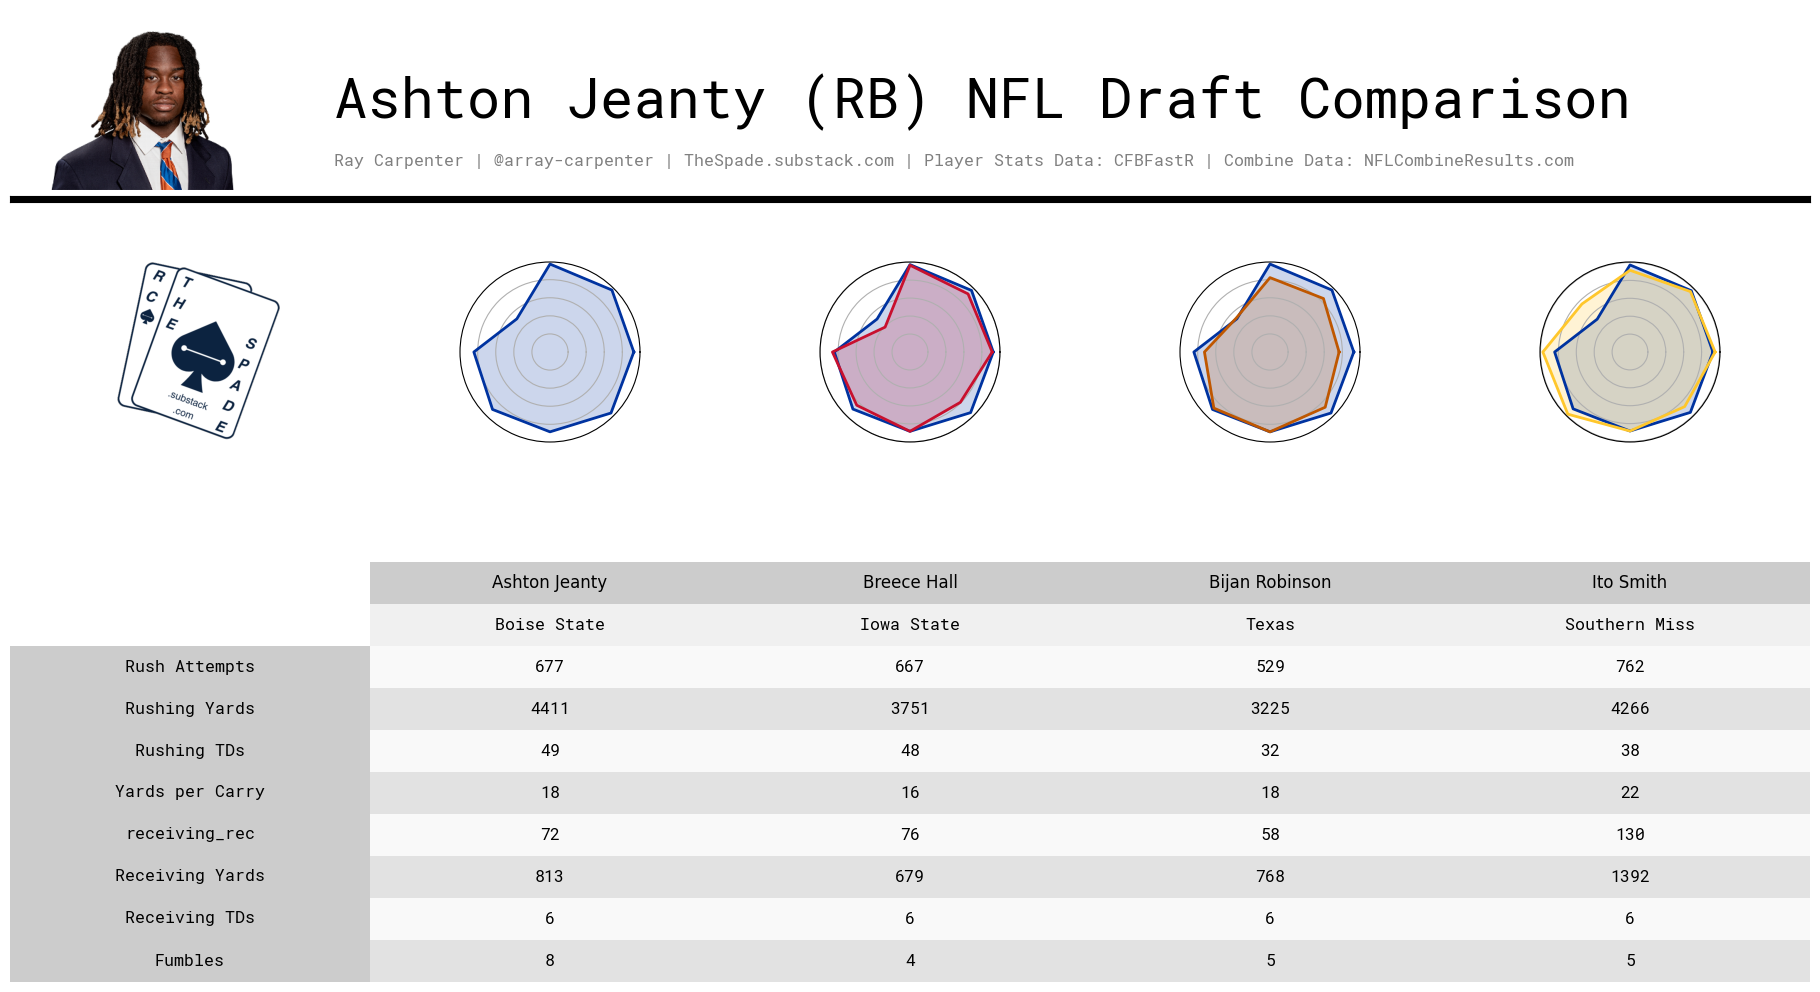

In [359]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from scipy.stats import rankdata
from PIL import Image
import urllib.request
import io
import matplotlib.font_manager as fm

# Load custom fonts
font_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/nfl-draft-data/Roboto_Mono/RobotoMono-VariableFont_wght.ttf'
roboto = fm.FontProperties(fname=font_path)
italic_roboto = fm.FontProperties(fname="C:/Users/RaymondCarpenter/Documents/GitHub/nfl-draft-data/Roboto_Mono/RobotoMono-Italic-VariableFont_wght.ttf")

# Load datasets
filtered_stats = pd.read_csv("filtered_player_stats_full.csv")
combine_stats = pd.read_csv("combine_data_unique_athlete_id_step4.csv")

# Rename columns in combine_stats to match filtered_stats
combine_stats.rename(columns={"Name": "player", "POS": "position"}, inplace=True)

# Merge position data from combine_stats into filtered_stats
filtered_stats = filtered_stats.merge(
    combine_stats[["player", "position"]],
    on="player",
    how="left"
)

# Manually assign "RB" to Ashton Jeanty since he has no combine data
filtered_stats.loc[filtered_stats["player"] == "Ashton Jeanty", "position"] = "RB"

# Define player and position
input_player = "Ashton Jeanty"

# Get the player's position
player_position = filtered_stats.loc[filtered_stats["player"] == input_player, "position"].values[0]

# Define position-based metrics
POSITION_BASELINES = {
    "QB": [
        "passing_att", "passing_pct", "passing_yds", "passing_td",
        "passing_ypa", "passing_int", "rushing_car", "rushing_yds",
        "rushing_td", "fumbles_fum"
    ],
    "RB": [
        "rushing_car", "rushing_yds", "rushing_td", "rushing_ypc",
        "receiving_rec", "receiving_yds", "receiving_td", "fumbles_fum"
    ]
}

# Keep only players with the same position as the input player
df = filtered_stats[filtered_stats["position"] == player_position]

# Sum player stats across seasons (except percentage-based ones)
df = df.groupby("player").sum().reset_index()

# Correct `passing_pct` to use the average instead of sum
if "passing_pct" in df.columns:
    passing_pct_avg = filtered_stats.groupby("player")["passing_pct"].mean().reset_index()
    df = df.merge(passing_pct_avg, on="player", how="left")
    df["passing_pct"] = df["passing_pct_y"] * 100  # Convert to percentage
    df.drop(columns=["passing_pct_y"], inplace=True)

# Keep only relevant metrics
valid_metrics = [col for col in POSITION_BASELINES.get(player_position, []) if col in df.columns]

# Convert to numeric & replace NaN
df[valid_metrics] = df[valid_metrics].apply(pd.to_numeric, errors="coerce").fillna(0)

# Compute percentile ranks for each metric (normalized to 0-1)
df_percentiles = df.copy()
for metric in valid_metrics:
    df_percentiles[metric] = rankdata(df[metric], method="average") / len(df)

# Get the player's data in percentile form
player_percentiles = df_percentiles[df_percentiles["player"] == input_player][valid_metrics].iloc[0]

# Compute similarity & find top 3 closest comparisons
df_percentiles["similarity"] = df_percentiles[valid_metrics].apply(lambda row: np.linalg.norm(row - player_percentiles), axis=1)
top3 = df_percentiles[df_percentiles["player"] != input_player].nsmallest(3, "similarity").reset_index()

# Ensure we get the player's latest school from the most recent year in the dataset
latest_teams = filtered_stats.loc[filtered_stats.groupby("player")["year"].idxmax(), ["player", "team"]]
latest_teams_dict = latest_teams.set_index("player")["team"].to_dict()

# Assign colors based on the most recent team in the dataset
comparison_players = [input_player] + top3["player"].tolist()
player_colors = [team_colors.get(latest_teams_dict.get(player, ""), "gray") for player in comparison_players]

# Prepare Radar Chart Data
data_for_radar = [player_percentiles.values] + [df_percentiles[df_percentiles["player"] == p][valid_metrics].iloc[0].values for p in top3["player"]]

# Column Name Replacements
COLUMN_RENAME_MAP = {
    "passing_att": "Attempts",
    "passing_pct": "Completion %",
    "passing_yds": "Passing Yards",
    "passing_td": "Passing TDs",
    "passing_ypa": "Yards per Attempt",
    "passing_int": "Interceptions",
    "rushing_car": "Rush Attempts",
    "rushing_yds": "Rushing Yards",
    "rushing_td": "Rushing TDs",
    "rushing_ypc": "Yards per Carry",
    "receiving_yds": "Receiving Yards",
    "receiving_td": "Receiving TDs",
    "fumbles_fum": "Fumbles"
}

# Create the Figure
fig = plt.figure(figsize=(18, 12))
fig.patch.set_facecolor("white")

# Load and Display Headshot in the Top Left
image_url = "https://a.espncdn.com/combiner/i?img=/i/headshots/college-football/players/full/4890973.png&w=350&h=254"
with urllib.request.urlopen(image_url) as url:
    player_image = Image.open(io.BytesIO(url.read()))

player_img_ax = fig.add_axes([0.01, 0.76, 0.15, 0.15], frameon=False)
player_img_ax.imshow(player_image)
player_img_ax.set_xticks([])
player_img_ax.set_yticks([])

# Title (Bigger and Closer to Headshot)
fig.text(0.18, 0.82, f"{input_player} ({player_position}) NFL Draft Comparison",
         fontsize=40, fontweight="bold", ha="left", fontproperties=roboto)

# Footer (Moved Below the Title)
fig.text(0.18, 0.78, "Ray Carpenter | @array-carpenter | TheSpade.substack.com | Player Stats Data: CFBFastR | Combine Data: NFLCombineResults.com",
         fontsize=12, fontweight="bold", ha="left", color="gray", fontproperties=roboto)

# Black Line Below Title and Image (No Axis Labels)
divider_ax = fig.add_axes([0, 0.75, 1, 0.005])
divider_ax.set_facecolor("black")
divider_ax.set_xticks([])
divider_ax.set_yticks([])

# Restore `1.png` to the Left of the First Radar Chart
logo_path = "1.png"
logo_ax = fig.add_axes([0.03, 0.55, 0.15, 0.15], frameon=False)
logo_img = mpimg.imread(logo_path)
logo_ax.imshow(logo_img)
logo_ax.set_xticks([])
logo_ax.set_yticks([])

# Radar Charts Layout
radar_height = 0.15
radar_width = 0.15
radar_y = 0.55
col_centers = np.linspace(0.3, 0.9, len(comparison_players))

for i, player_name in enumerate(comparison_players):
    ax_pos = [col_centers[i] - radar_width / 2, radar_y, radar_width, radar_height]
    rax = fig.add_axes(ax_pos, polar=True)

    angles = np.linspace(0, 2 * np.pi, len(valid_metrics), endpoint=False)
    angles_closed = np.concatenate([angles, [angles[0]]])

    # Always plot input_player's data (first player)
    pvec_closed = np.concatenate([data_for_radar[0], [data_for_radar[0][0]]])
    rax.plot(angles_closed, pvec_closed, color=player_colors[0], linewidth=2, label=input_player)
    rax.fill(angles_closed, pvec_closed, color=player_colors[0], alpha=0.2)

    # Plot current player's data if it's not the first player
    if i > 0:
        pvec_closed = np.concatenate([data_for_radar[i], [data_for_radar[i][0]]])
        rax.plot(angles_closed, pvec_closed, color=player_colors[i], linewidth=2, label=player_name)
        rax.fill(angles_closed, pvec_closed, color=player_colors[i], alpha=0.2)

    rax.set_yticklabels([])
    rax.set_xticks([])
    rax.set_xticklabels([])

# Extract the most recent team for each player based on athlete_id
most_recent_teams = filtered_stats.loc[filtered_stats.groupby("athlete_id")["year"].idxmax()][["athlete_id", "team"]]
most_recent_teams_dict = most_recent_teams.set_index("athlete_id")["team"].to_dict()

# Get the athlete_id for each player in the comparison list
player_athlete_ids = filtered_stats.set_index("player")["athlete_id"].to_dict()
comparison_athlete_ids = [player_athlete_ids.get(player, None) for player in comparison_players]

# Define the desired font size for the table
table_fontsize = 22  # Adjust this value as needed

# Restore Table Below Radar Charts
table_ax = fig.add_axes([0, 0.1, 1, 0.35])
table_ax.set_axis_off()
table = Table(table_ax, bbox=[0, 0, 1, 1])

# Table Data with Renamed Columns
comparison_data = df.set_index("player").loc[comparison_players, valid_metrics]
comparison_data_t = comparison_data.transpose()
comparison_data_t.rename(index=COLUMN_RENAME_MAP, inplace=True)

# Add column headers (player names)
for col_idx, column in enumerate(comparison_data_t.columns):
    cell = table.add_cell(0, col_idx + 1, 0.1, 0.05, text=column, loc="center", facecolor="#cccccc")
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for header cells
    cell.set_edgecolor('none')

# Add team row underneath player names
for col_idx, (player, athlete_id) in enumerate(zip(comparison_data_t.columns, comparison_athlete_ids)):
    team = most_recent_teams_dict.get(athlete_id, "N/A")  # Get the most recent team for the player based on athlete_id
    cell = table.add_cell(1, col_idx + 1, 0.1, 0.05, text=team, loc="center", facecolor="#f0f0f0", fontproperties=roboto)
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for team cells
    cell.set_edgecolor('none')

# Add row labels and format values
for row_idx, (row_name, row_vals) in enumerate(comparison_data_t.iterrows()):
    cell = table.add_cell(row_idx + 2, 0, 0.1, 0.05, text=row_name, loc="center", facecolor="#cccccc", fontproperties=roboto)
    cell.get_text().set_fontsize(table_fontsize)  # Set font size for row label cells
    cell.set_edgecolor('none')
    for col_idx, val in enumerate(row_vals):
        formatted_val = f"{val:.2f}" if row_name == "Yards per Attempt" else f"{int(val)}" if row_name != "Completion %" else f"{val:.1f}%"
        cell = table.add_cell(row_idx + 2, col_idx + 1, 0.1, 0.05, text=formatted_val, loc="center", fontproperties=roboto)
        cell.get_text().set_fontsize(table_fontsize)  # Set font size for data cells
        cell.set_edgecolor('none')

# Alternate row colors for better readability
for row_idx in range(2, len(comparison_data_t) + 2):
    for col_idx in range(1, len(comparison_players) + 1):
        cell = table[(row_idx, col_idx)]
        cell.set_facecolor("#f9f9f9" if row_idx % 2 == 0 else "#e2e2e2")

table_ax.axis('off')
table_ax.add_table(table)

plt.show()
